# DPC

In [ ]:
import pandas as pd
import itertools

# Define all possible dipeptides from 20 amino acids
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
dipeptides = [''.join(pair) for pair in itertools.product(amino_acids, repeat=2)]

# Function to compute DPC features
def compute_dpc_features(sequence):
    sequence = sequence.upper()  # Ensure sequence is in uppercase
    seq_len = len(sequence)
    dpc_vector = {dipeptide: 0 for dipeptide in dipeptides}

    # Loop through the sequence to calculate dipeptide frequencies
    for i in range(seq_len - 1):
        dipeptide = sequence[i:i + 2]
        if dipeptide in dpc_vector:
            dpc_vector[dipeptide] += 1

    # Normalize frequencies by dividing by total possible dipeptides in the sequence
    total_dipeptides = seq_len - 1
    for dipeptide in dpc_vector:
        dpc_vector[dipeptide] /= total_dipeptides

    return list(dpc_vector.values())

# Function to read FASTA file and process DPC features
def process_fasta_dpc(input_fasta, output_csv):
    sequences = []
    with open(input_fasta, 'r') as f:
        for line in f:
            if line.startswith('>'):  # Skip header lines
                continue
            sequences.append(line.strip())  # Store the sequence

    # Create a DataFrame with sequences
    df = pd.DataFrame({'sequence': sequences})

    # Compute DPC features for each sequence
    dpc_features = df['sequence'].apply(compute_dpc_features)

    # Convert DPC features to DataFrame
    dpc_df = pd.DataFrame(dpc_features.tolist(), columns=dipeptides)

    # Save the DPC features to a new CSV file
    dpc_df.to_csv(output_csv, index=False)
    print(f"Saved DPC features to {output_csv}")

# Paths for input CSV files and output CSV files
main_p = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/POSITIVE_main (2).fasta"
main_n = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/NEGATIVE_main (2).fasta"
validation_p = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/POSITIVE_validation (2).fasta"
validation_n = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/NEGATIVE_validation (2).fasta"

# Output paths for DPC feature CSVs
output_main_p = "/content/dpc_main_positive.csv"
output_main_n = "/content/dpc_main_negative.csv"
output_validation_p = "/content/dpc_validation_positive.csv"
output_validation_n = "/content/dpc_validation_negative.csv"

# Process each dataset and save DPC features
process_fasta_dpc(main_p, output_main_p)
process_fasta_dpc(main_n, output_main_n)
process_fasta_dpc(validation_p, output_validation_p)
process_fasta_dpc(validation_n, output_validation_n)

Saved DPC features to /content/dpc_main_positive.csv
Saved DPC features to /content/dpc_main_negative.csv
Saved DPC features to /content/dpc_validation_positive.csv
Saved DPC features to /content/dpc_validation_negative.csv


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


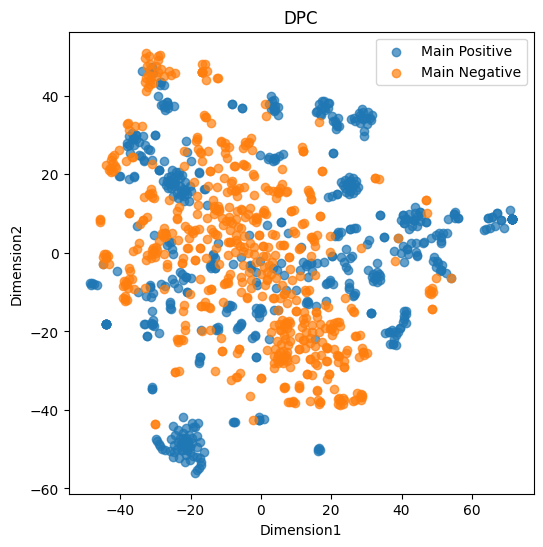

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load AAC features for the main dataset
main_positive = pd.read_csv("/content/dpc_main_positive.csv")
main_negative = pd.read_csv("/content/dpc_main_negative.csv")

# Add labels for the main dataset
main_positive["label"] = "Main Positive"
main_negative["label"] = "Main Negative"

# Combine main datasets into one DataFrame
main_data = pd.concat([main_positive, main_negative])

# Separate features and labels
features = main_data.drop(columns=["label"])  # Drop the label column
labels = main_data["label"]  # Keep the label column

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results back to DataFrame
main_data["t-SNE-1"] = tsne_results[:, 0]
main_data["t-SNE-2"] = tsne_results[:, 1]

# Plot the t-SNE results for main dataset
plt.figure(figsize=(6, 6))
for label in main_data["label"].unique():
    subset = main_data[main_data["label"] == label]
    plt.scatter(subset["t-SNE-1"], subset["t-SNE-2"], label=label, alpha=0.7)

plt.title("DPC")
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd

def check_columns_and_length(file_path):

    df = pd.read_csv(file_path)

    num_columns = len(df.columns)
    num_rows = len(df)

    return num_columns, num_rows

main_p = "/content/dpc_main_positive.csv"
main_n = "/content/dpc_main_negative.csv"
validation_p = "/content/dpc_validation_positive.csv"
validation_n = "/content/dpc_validation_negative.csv"

main_p_info = check_columns_and_length(main_p)
main_n_info = check_columns_and_length(main_n)
validation_p_info = check_columns_and_length(validation_p)
validation_n_info = check_columns_and_length(validation_n)

print("Main Positive Dataset: Columns = {}, Rows = {}".format(main_p_info[0], main_p_info[1]))
print("Main Negative Dataset: Columns = {}, Rows = {}".format(main_n_info[0], main_n_info[1]))
print("Validation Positive Dataset: Columns = {}, Rows = {}".format(validation_p_info[0], validation_p_info[1]))
print("Validation Negative Dataset: Columns = {}, Rows = {}".format(validation_n_info[0], validation_n_info[1]))


Main Positive Dataset: Columns = 400, Rows = 582
Main Negative Dataset: Columns = 400, Rows = 582
Validation Positive Dataset: Columns = 400, Rows = 150
Validation Negative Dataset: Columns = 400, Rows = 150


In [ ]:
# Import necessary libraries
import pandas as pd

def check_null_values(file_path):

    df = pd.read_csv(file_path)

    null_values = df.isnull().sum().sum()
    return null_values

main_p_nulls = check_null_values(main_p)
main_n_nulls = check_null_values(main_n)
validation_p_nulls = check_null_values(validation_p)
validation_n_nulls = check_null_values(validation_n)

print(f"Main Positive Dataset - Null Values: {main_p_nulls}")
print(f"Main Negative Dataset - Null Values: {main_n_nulls}")
print(f"Validation Positive Dataset - Null Values: {validation_p_nulls}")
print(f"Validation Negative Dataset - Null Values: {validation_n_nulls}")


Main Positive Dataset - Null Values: 0
Main Negative Dataset - Null Values: 0
Validation Positive Dataset - Null Values: 0
Validation Negative Dataset - Null Values: 0


In [ ]:
!pip install scikeras

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


# **Deep learning approach combining Conv1D, LSTM, and Dense layers**

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, BatchNormalization

# Load AAC feature datasets
# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_negative.csv")


# Create labels
main_p['label'] = 1
main_n['label'] = 0
validation_p['label'] = 1
validation_n['label'] = 0

# Combine datasets
train_data = pd.concat([main_p, main_n], ignore_index=True)
val_data = pd.concat([validation_p, validation_n], ignore_index=True)

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_val = val_data.drop(columns=['label']).values
y_val = val_data['label'].values

# Reshape input for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Model Architecture
model = Sequential()

# 1. Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# 2. LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# 3. Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 398, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 398, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 199, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 199, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 195, 128)            │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 195, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 97, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 97, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 91, 256)             │         229,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 91, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 45, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 45, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371,585 (1.42 MB)

 Trainable params: 370,689 (1.41 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.5728 - loss: 0.9300 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.6229 - loss: 0.6483 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.6545 - loss: 0.6294 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.6403 - loss: 0.6688 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - accuracy: 0.6704 - loss: 0.5962 - val_accuracy: 0.5000 - val_loss: 1.1443
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.7046 - loss: 0.5890 - val_accuracy: 0.5000 - val_loss: 0.8845
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.7262 - loss: 0.5587 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - accuracy: 0.7268 - loss: 0.5445 - va

In [ ]:
# Print final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9545
Final Validation Accuracy: 0.8033


# **Hybrid CNN-LSTM Model for Cell-Penetrating Peptide Classification**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_negative.csv")

# Label the datasets
main_p['label'] = 1
main_n['label'] = 0
validation_p['label'] = 1
validation_n['label'] = 0

# Combine datasets
train_data = pd.concat([main_p, main_n], ignore_index=True)
val_data = pd.concat([validation_p, validation_n], ignore_index=True)

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_val = val_data.drop(columns=['label']).values
y_val = val_data['label'].values

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape data for Conv1D input
X_train = X_train[..., np.newaxis]  # Adding channel dimension
X_val = X_val[..., np.newaxis]      # Adding channel dimension

# Model Architecture
model = Sequential()

# Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the validation data
val_predictions = (model.predict(X_val) > 0.5).astype(int)
accuracy = accuracy_score(y_val, val_predictions)

print("\nValidation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Save the trained model
model.save("cell_penetrating_peptide_model.h5")
print("\nModel saved as 'cell_penetrating_peptide_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 398, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 398, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 199, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 199, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 197, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 197, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 197, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 195, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 195, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 97, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 97, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,129 (875.50 KB)

 Trainable params: 223,233 (872.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.4910 - loss: 12.3499 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - accuracy: 0.5235 - loss: 0.7326 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.5459 - loss: 0.6993 - val_accuracy: 0.5033 - val_loss: 0.6946
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - accuracy: 0.5529 - loss: 0.7151 - val_accuracy: 0.5033 - val_loss: 0.6969
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - accuracy: 0.5917 - loss: 0.6867 - val_accuracy: 0.5133 - val_loss: 0.6989
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 319ms/step - accuracy: 0.5124 - loss: 0.7179 - val_accuracy: 0.5100 - val_loss: 0.6979
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.5549 - loss: 0.6975 - val_accuracy: 0.5100 - val_loss: 0.6989
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.5645 - loss: 0.6972 -


Validation Accuracy: 0.5966666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.34      0.46       150
           1       0.56      0.85      0.68       150

    accuracy                           0.60       300
   macro avg       0.63      0.60      0.57       300
weighted avg       0.63      0.60      0.57       300


Model saved as 'cell_penetrating_peptide_model.h5'


# All AAlgorithm

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_negative.csv")


In [ ]:
# Label the datasets
main_p['label'] = 1
main_n['label'] = 0
validation_p['label'] = 1
validation_n['label'] = 0

# Combine datasets
train_data = pd.concat([main_p, main_n], ignore_index=True)
val_data = pd.concat([validation_p, validation_n], ignore_index=True)

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_val = val_data.drop(columns=['label']).values
y_val = val_data['label'].values


In [ ]:
# Dictionary of models
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "MLP": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the neural network models
models["Neural Network"].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
models["MLP"].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Store accuracies
results = []

# Train each model and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["Neural Network", "MLP"]:
        # Neural Network training
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        train_pred = (model.predict(X_train) > 0.5).astype("int32")
        val_pred = (model.predict(X_val) > 0.5).astype("int32")
    else:
        # Traditional ML model training
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

    # Calculate train and validation accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)

    results.append({"Model": name, "Train Accuracy": train_accuracy, "Validation Accuracy": val_accuracy})


Training SVM...

Training Decision Tree...

Training Random Forest...

Training Logistic Regression...

Training k-NN...

Training Naive Bayes...

Training Gradient Boosting...

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:57:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training CatBoost...

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training Neural Network...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Training MLP...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Convert to DataFrame and sort by Validation Accuracy and Train Accuracy in descending order
results_df = pd.DataFrame(results).sort_values(by=["Validation Accuracy", "Train Accuracy"], ascending=False).reset_index(drop=True)

# Display results
print("\nModel Accuracy Table (Descending Order of Validation Accuracy)")
print(results_df)


Model Accuracy Table (Descending Order of Validation Accuracy)
                  Model  Train Accuracy  Validation Accuracy
0                   MLP        0.995704             0.920000
1              CatBoost        0.986254             0.920000
2               XGBoost        0.990550             0.916667
3              LightGBM        0.994845             0.913333
4         Random Forest        0.996564             0.903333
5        Neural Network        0.995704             0.893333
6              AdaBoost        0.915808             0.886667
7     Gradient Boosting        0.961340             0.883333
8         Decision Tree        0.996564             0.870000
9                  k-NN        0.931271             0.863333
10                  SVM        0.841065             0.833333
11  Logistic Regression        0.830756             0.823333
12          Naive Bayes        0.795533             0.743333


# **Cross-Validation (K-folf 5)**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# Dictionary of models
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
}


In [ ]:
# Define Neural Network models
def create_neural_network(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_mlp(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
# Cross-validation for traditional models
results = []

# For traditional ML models, we use cross_val_score
for name, model in models.items():
    print(f"\nPerforming Cross-validation for {name}...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate cross-validation accuracy
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    std_accuracy = np.std(cv_scores)

    results.append({"Model": name, "Mean CV Accuracy": mean_accuracy, "STD CV Accuracy": std_accuracy})

# Cross-validation for Neural Networks (manual implementation)
for name, create_model in [("Neural Network", create_neural_network), ("MLP", create_mlp)]:
    print(f"\nPerforming Cross-validation for {name}...")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Custom function to calculate accuracy for neural networks
    def neural_network_cross_val(model_func, X_train, y_train):
        accuracies = []
        for train_index, val_index in cv.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = model_func(X_train.shape[1])  # Create a new model for each fold
            model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)

            y_pred = (model.predict(X_val_fold) > 0.5).astype("int32")
            accuracy = accuracy_score(y_val_fold, y_pred)
            accuracies.append(accuracy)

        return np.mean(accuracies), np.std(accuracies)

    mean_accuracy, std_accuracy = neural_network_cross_val(create_model, X_train, y_train)
    results.append({"Model": name, "Mean CV Accuracy": mean_accuracy, "STD CV Accuracy": std_accuracy})



Performing Cross-validation for SVM...

Performing Cross-validation for Decision Tree...

Performing Cross-validation for Random Forest...

Performing Cross-validation for Logistic Regression...

Performing Cross-validation for k-NN...

Performing Cross-validation for Naive Bayes...

Performing Cross-validation for Gradient Boosting...

Performing Cross-validation for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Performing Cross-validation for LightGBM...
[LightGBM] [Info] Number of positive: 465, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2189
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 192
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499463 -> initscore=-0.002148
[LightGBM] [Info] Start training from score -0.002148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 465, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001794 seconds.
You ca

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Performing Cross-validation for Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Performing Cross-validation for MLP...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Convert to DataFrame and display
cv_results_df = pd.DataFrame(results).sort_values(by="Mean CV Accuracy", ascending=False).reset_index(drop=True)
print("\nCross-Validation Accuracy Table")
print(cv_results_df)


Cross-Validation Accuracy Table
                  Model  Mean CV Accuracy  STD CV Accuracy
0         Random Forest          0.914940         0.007489
1              LightGBM          0.908066         0.016258
2               XGBoost          0.905505         0.008933
3              CatBoost          0.899475         0.011158
4        Neural Network          0.897762         0.016850
5                   MLP          0.896900         0.018654
6                  k-NN          0.890880         0.023359
7     Gradient Boosting          0.889167         0.013483
8         Decision Tree          0.853108         0.019168
9              AdaBoost          0.840199         0.018552
10                  SVM          0.812691         0.018208
11  Logistic Regression          0.800670         0.015741
12          Naive Bayes          0.747406         0.016415


# **Hyperparameter optimization with Optuna**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_negative.csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)])
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)])

# Split features and labels
X_train = main_data.drop("label", axis=1)
y_train = main_data["label"]
X_val = validation_data.drop("label", axis=1)
y_val = validation_data["label"]



# Define models with MLP included
models = {
    "SVM": lambda trial: SVC(
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20)
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
    ),
    "Neural Network": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("hidden_layer_1", 10, 100),
            trial.suggest_int("hidden_layer_2", 10, 100)
        ),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150)
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42
    )
}


results = []

def optimize_model(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Store the results
    results.append({
        "Model": model_name,
        "Accuracy": study.best_value,
        "Best Params": study.best_params
    })

# Run optimization for all models
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    optimize_model(model_name, model_func)


# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Display the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2024-12-27 10:00:54,258] A new study created in memory with name: no-name-c0fb98fd-a452-4a5b-b314-ee9a4854a32d


Optimizing SVM...


[I 2024-12-27 10:00:54,473] Trial 0 finished with value: 0.8466666666666667 and parameters: {'C': 2.7368821049328456, 'kernel': 'poly'}. Best is trial 0 with value: 0.8466666666666667.
[I 2024-12-27 10:00:54,746] Trial 1 finished with value: 0.9033333333333333 and parameters: {'C': 1.2209415111953803, 'kernel': 'rbf'}. Best is trial 1 with value: 0.9033333333333333.
[I 2024-12-27 10:00:54,983] Trial 2 finished with value: 0.8533333333333334 and parameters: {'C': 1.799498663371413, 'kernel': 'linear'}. Best is trial 1 with value: 0.9033333333333333.
[I 2024-12-27 10:00:55,176] Trial 3 finished with value: 0.88 and parameters: {'C': 5.732726140045568, 'kernel': 'linear'}. Best is trial 1 with value: 0.9033333333333333.
[I 2024-12-27 10:00:55,457] Trial 4 finished with value: 0.9033333333333333 and parameters: {'C': 1.3564134247103679, 'kernel': 'rbf'}. Best is trial 1 with value: 0.9033333333333333.
[I 2024-12-27 10:00:55,741] Trial 5 finished with value: 0.9033333333333333 and parameter

Optimizing Decision Tree...


[I 2024-12-27 10:01:01,616] Trial 6 finished with value: 0.82 and parameters: {'max_depth': 7, 'min_samples_split': 8}. Best is trial 1 with value: 0.86.
[I 2024-12-27 10:01:01,663] Trial 7 finished with value: 0.85 and parameters: {'max_depth': 17, 'min_samples_split': 3}. Best is trial 1 with value: 0.86.
[I 2024-12-27 10:01:01,689] Trial 8 finished with value: 0.7766666666666666 and parameters: {'max_depth': 5, 'min_samples_split': 4}. Best is trial 1 with value: 0.86.
[I 2024-12-27 10:01:01,729] Trial 9 finished with value: 0.8366666666666667 and parameters: {'max_depth': 14, 'min_samples_split': 4}. Best is trial 1 with value: 0.86.
[I 2024-12-27 10:01:01,785] Trial 10 finished with value: 0.8666666666666667 and parameters: {'max_depth': 20, 'min_samples_split': 2}. Best is trial 10 with value: 0.8666666666666667.
[I 2024-12-27 10:01:01,841] Trial 11 finished with value: 0.86 and parameters: {'max_depth': 19, 'min_samples_split': 2}. Best is trial 10 with value: 0.8666666666666667

Optimizing Random Forest...


[I 2024-12-27 10:01:03,124] Trial 0 finished with value: 0.84 and parameters: {'n_estimators': 81, 'max_depth': 7, 'min_samples_split': 2}. Best is trial 0 with value: 0.84.
[I 2024-12-27 10:01:03,775] Trial 1 finished with value: 0.85 and parameters: {'n_estimators': 261, 'max_depth': 7, 'min_samples_split': 7}. Best is trial 1 with value: 0.85.
[I 2024-12-27 10:01:04,730] Trial 2 finished with value: 0.81 and parameters: {'n_estimators': 468, 'max_depth': 3, 'min_samples_split': 4}. Best is trial 1 with value: 0.85.
[I 2024-12-27 10:01:05,627] Trial 3 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 286, 'max_depth': 17, 'min_samples_split': 9}. Best is trial 3 with value: 0.8833333333333333.
[I 2024-12-27 10:01:06,180] Trial 4 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 203, 'max_depth': 10, 'min_samples_split': 9}. Best is trial 3 with value: 0.8833333333333333.
[I 2024-12-27 10:01:06,818] Trial 5 finished with value: 0.86 and pa

Optimizing Logistic Regression...


[I 2024-12-27 10:01:40,363] Trial 3 finished with value: 0.8666666666666667 and parameters: {'C': 7.116980720323456, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-27 10:01:40,413] Trial 4 finished with value: 0.8366666666666667 and parameters: {'C': 1.4557321385955377, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-27 10:01:40,445] Trial 5 finished with value: 0.8666666666666667 and parameters: {'C': 6.731103558891566, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-27 10:01:40,488] Trial 6 finished with value: 0.8033333333333333 and parameters: {'C': 0.46967765316816645, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-27 10:01:40,546] Trial 7 finished with value: 0.7833333333333333 and parameters: {'C': 0.32718617794152627, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-27 10:01:40,601] Trial 8 finished with value: 0.86 

Optimizing k-NN...


[I 2024-12-27 10:01:42,324] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 16}. Best is trial 1 with value: 0.8333333333333334.
[I 2024-12-27 10:01:42,391] Trial 2 finished with value: 0.8166666666666667 and parameters: {'n_neighbors': 20}. Best is trial 1 with value: 0.8333333333333334.
[I 2024-12-27 10:01:42,465] Trial 3 finished with value: 0.8433333333333334 and parameters: {'n_neighbors': 10}. Best is trial 3 with value: 0.8433333333333334.
[I 2024-12-27 10:01:42,532] Trial 4 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 16}. Best is trial 3 with value: 0.8433333333333334.
[I 2024-12-27 10:01:42,598] Trial 5 finished with value: 0.86 and parameters: {'n_neighbors': 8}. Best is trial 5 with value: 0.86.
[I 2024-12-27 10:01:42,668] Trial 6 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 17}. Best is trial 5 with value: 0.86.
[I 2024-12-27 10:01:42,736] Trial 7 finished with value: 0.8233333333333334 a

Optimizing Naive Bayes...


[I 2024-12-27 10:01:44,317] Trial 9 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:01:44,335] Trial 10 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:01:44,352] Trial 11 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:01:44,370] Trial 12 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:01:44,387] Trial 13 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:01:44,404] Trial 14 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:01:44,421] Trial 15 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433

Optimizing Gradient Boosting...


[I 2024-12-27 10:01:53,541] Trial 0 finished with value: 0.91 and parameters: {'n_estimators': 339, 'learning_rate': 0.06749169578815689, 'max_depth': 9}. Best is trial 0 with value: 0.91.
[I 2024-12-27 10:02:13,603] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 473, 'learning_rate': 0.43983775299005917, 'max_depth': 14}. Best is trial 0 with value: 0.91.
[I 2024-12-27 10:02:19,383] Trial 2 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 495, 'learning_rate': 0.1934526662576235, 'max_depth': 4}. Best is trial 2 with value: 0.9166666666666666.
[I 2024-12-27 10:02:39,866] Trial 3 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 492, 'learning_rate': 0.4007468441694418, 'max_depth': 15}. Best is trial 2 with value: 0.9166666666666666.
[I 2024-12-27 10:02:44,451] Trial 4 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 247, 'learning_rate': 0.09777844726088791, 'max_depth': 5}. Best is trial 2 with

Optimizing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-27 10:08:13,558] Trial 0 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 366, 'max_depth': 7, 'learning_rate': 0.46590388768427166}. Best is trial 0 with value: 0.9066666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-27 10:08:18,028] Trial 1 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 226, 'max_depth': 8, 'learning_rate': 0.23860773003602745}. Best is trial 0 with value: 0.9066666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "u

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2024-12-27 10:09:01,572] Trial 0 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 435, 'max_depth': 14, 'learning_rate': 0.04694314453731943}. Best is trial 0 with value: 0.9133333333333333.
[I 2024-12-27 10:09:01,760] Trial 1 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 138, 'max_depth': 19, 'learning_rate': 0.3126650815933834}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:01,965] Trial 2 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 161, 'max_depth': 14, 'learning_rate': 0.44716578908393423}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2024-12-27 10:09:02,249] Trial 3 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 242, 'max_depth': 16, 'learning_rate': 0.32282456559164424}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:02,548] Trial 4 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 301, 'max_depth': 7, 'learning_rate': 0.43823508717938753}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:02,710] Trial 5 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 123, 'max_depth': 9, 'learning_rate': 0.48404731995594996}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:03,213] Trial 6 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 485, 'max_depth': 11, 'learning_rate': 0.24034267534475995}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:03,650] Trial 7 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 429, 'max_depth': 9, 'learning_rate': 0.23450289923529957}. Best is trial 0 with value: 0.9133333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:03,939] Trial 8 finished with value: 0.91 and parameters: {'n_estimators': 207, 'max_depth': 12, 'learning_rate': 0.20011256857734414}. Best is trial 0 with value: 0.9133333333333333.
[I 2024-12-27 10:09:04,038] Trial 9 finished with value: 0.92 and parameters: {'n_estimators': 54, 'max_depth': 12, 'learning_rate': 0.30729055795126753}. Best is trial 9 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:04,141] Trial 10 finished with value: 0.86 and parameters: {'n_estimators': 66, 'max_depth': 3, 'learning_rate': 0.10667554853045522}. Best is trial 9 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:04,677] Trial 11 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 346, 'max_depth': 17, 'learning_rate': 0.025881553449671024}. Best is trial 9 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:05,180] Trial 12 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 376, 'max_depth': 14, 'learning_rate': 0.13472045744156863}. Best is trial 9 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:05,932] Trial 13 finished with value: 0.91 and parameters: {'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.012740024633231588}. Best is trial 9 with value: 0.92.
[I 2024-12-27 10:09:06,071] Trial 14 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 69, 'max_depth': 13, 'learning_rate': 0.32702568903693013}. Best is trial 9 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:06,416] Trial 15 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 297, 'max_depth': 16, 'learning_rate': 0.38139763431231755}. Best is trial 9 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:06,915] Trial 16 finished with value: 0.91 and parameters: {'n_estimators': 420, 'max_depth': 10, 'learning_rate': 0.1509363314680754}. Best is trial 9 with value: 0.92.
[I 2024-12-27 10:09:07,157] Trial 17 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 215, 'max_depth': 6, 'learning_rate': 0.28885809215532265}. Best is trial 9 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:07,679] Trial 18 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 352, 'max_depth': 18, 'learning_rate': 0.08028565182791972}. Best is trial 9 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:09:08,119] Trial 19 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 436, 'max_depth': 15, 'learning_rate': 0.38312233284184527}. Best is trial 9 with value: 0.92.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:08,436] Trial 20 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 263, 'max_depth': 7, 'learning_rate': 0.19252231168810138}. Best is trial 20 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:08,730] Trial 21 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 268, 'max_depth': 6, 'learning_rate': 0.19778101486522676}. Best is trial 20 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:08,990] Trial 22 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 259, 'max_depth': 4, 'learning_rate': 0.19747301712552934}. Best is trial 20 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:09:09,425] Trial 23 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 318, 'max_depth': 6, 'learning_rate': 0.1865476914481499}. Best is trial 20 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:09:09,791] Trial 24 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 183, 'max_depth': 8, 'learning_rate': 0.26697046072878494}. Best is trial 20 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:09:10,175] Trial 25 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 243, 'max_depth': 5, 'learning_rate': 0.15938492519107328}. Best is trial 20 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:09:10,409] Trial 26 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.36187063089674865}. Best is trial 20 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:09:10,964] Trial 27 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 276, 'max_depth': 11, 'learning_rate': 0.2287925628843002}. Best is trial 20 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2024-12-27 10:09:11,297] Trial 28 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 191, 'max_depth': 5, 'learning_rate': 0.2903942694187047}. Best is trial 20 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:09:11,589] Trial 29 finished with value: 0.89 and parameters: {'n_estimators': 198, 'max_depth': 3, 'learning_rate': 0.08344063103165729}. Best is trial 20 with value: 0.9266666666666666.
[I 2024-12-27 10:09:11,595] A new study created in memory with name: no-name-1cd67f18-f6f3-4397-ba75-0734f41bf380



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:09:14,044] Trial 0 finished with value: 0.7866666666666666 and parameters: {'n_estimators': 255, 'learning_rate': 0.2055397796878845}. Best is trial 0 with value: 0.7866666666666666.
[I 2024-12-27 10:09:16,500] Trial 1 finished with value: 0.7833333333333333 and parameters: {'n_estimators': 404, 'learning_rate': 0.1388383298449479}. Best is trial 0 with value: 0.7866666666666666.
[I 2024-12-27 10:09:18,933] Trial 2 finished with value: 0.89 and parameters: {'n_estimators': 401, 'learning_rate': 0.8823942363725686}. Best is trial 2 with value: 0.89.
[I 2024-12-27 10:09:19,499] Trial 3 finished with value: 0.7866666666666666 and parameters: {'n_estimators': 91, 'learning_rate': 0.6473159647168738}. Best is trial 2 with value: 0.89.
[I 2024-12-27 10:09:22,236] Trial 4 finished with value: 0.8366666666666667 and parameters: {'n_estimators': 453, 'learning_rate': 0.3202917059798003}. Best is trial 2 with value: 0.89.
[I 2024-12-27 10:09:23,207] Trial 5 finished with value: 

Optimizing Neural Network...


[I 2024-12-27 10:10:22,045] Trial 0 finished with value: 0.9033333333333333 and parameters: {'hidden_layer_1': 23, 'hidden_layer_2': 68, 'learning_rate_init': 0.019970529576315676}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-27 10:10:24,031] Trial 1 finished with value: 0.8833333333333333 and parameters: {'hidden_layer_1': 35, 'hidden_layer_2': 89, 'learning_rate_init': 0.075280712155658}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-27 10:10:25,273] Trial 2 finished with value: 0.88 and parameters: {'hidden_layer_1': 22, 'hidden_layer_2': 55, 'learning_rate_init': 0.046999337970502424}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-27 10:10:27,096] Trial 3 finished with value: 0.8866666666666667 and parameters: {'hidden_layer_1': 27, 'hidden_layer_2': 53, 'learning_rate_init': 0.05801779367980765}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-27 10:10:27,922] Trial 4 finished with value: 0.89 and parameters: {'hidden_layer_1': 5

Optimizing MLP...


[I 2024-12-27 10:10:59,988] Trial 0 finished with value: 0.8833333333333333 and parameters: {'layer_1': 83, 'layer_2': 125, 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.060559394944570896}. Best is trial 0 with value: 0.8833333333333333.
[I 2024-12-27 10:11:01,671] Trial 1 finished with value: 0.8666666666666667 and parameters: {'layer_1': 75, 'layer_2': 128, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.057823968937252126}. Best is trial 0 with value: 0.8833333333333333.
[I 2024-12-27 10:11:04,326] Trial 2 finished with value: 0.8566666666666667 and parameters: {'layer_1': 150, 'layer_2': 100, 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.09065308002172576}. Best is trial 0 with value: 0.8833333333333333.
[I 2024-12-27 10:11:06,257] Trial 3 finished with value: 0.8466666666666667 and parameters: {'layer_1': 139, 'layer_2': 76, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.09597590699287538}. Best is trial

                  Model  Accuracy  \
0                   SVM  0.930000   
1         Decision Tree  0.873333   
2         Random Forest  0.906667   
3   Logistic Regression  0.870000   
4                  k-NN  0.893333   
5           Naive Bayes  0.743333   
6     Gradient Boosting  0.923333   
7               XGBoost  0.930000   
8              LightGBM  0.926667   
9              AdaBoost  0.906667   
10       Neural Network  0.920000   
11                  MLP  0.910000   

                                          Best Params  
0           {'C': 5.162360714041079, 'kernel': 'rbf'}  
1           {'max_depth': 20, 'min_samples_split': 2}  
2   {'n_estimators': 459, 'max_depth': 19, 'min_sa...  
3     {'C': 9.827680474577294, 'solver': 'liblinear'}  
4                                  {'n_neighbors': 4}  
5                                                  {}  
6   {'n_estimators': 311, 'learning_rate': 0.06983...  
7   {'n_estimators': 230, 'max_depth': 9, 'learnin...  
8   {'n_estima

In [ ]:
# Function to calculate metrics with model name
def calculate_metrics(y_true, y_pred, model_name=None):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "MCC": mcc,
        "Kappa": kappa,
        "AUC": auc,
    }

# Results storage
results = []

# Optimization function
def optimize_model_with_metrics(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        trial.set_user_attr("preds", preds)
        metrics = calculate_metrics(y_val, preds, model_name=model_name)
        return metrics["Accuracy"]

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Store the best trial metrics
    best_trial_preds = study.best_trial.user_attrs["preds"]
    best_metrics = calculate_metrics(y_val, best_trial_preds, model_name=model_name)
    best_metrics["Best Params"] = study.best_params
    results.append(best_metrics)

# Run optimization for all models
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    optimize_model_with_metrics(model_name, model_func)

# Store the final results with selected metrics and best parameters
final_results = []
for result in results:
    final_results.append(
        {
            "Model": result["Model"],
            "Accuracy": result["Accuracy"],
            "Sensitivity": result["Sensitivity"],
            "Specificity": result["Specificity"],
            "MCC": result["MCC"],
            "Kappa": result["Kappa"],
            "AUC": result["AUC"],
            "Best Params": result["Best Params"],
        }
    )

# Convert results to a DataFrame and display it
final_results_df = pd.DataFrame(final_results)
print(final_results_df)


[I 2024-12-27 10:39:13,014] A new study created in memory with name: no-name-38e3d33f-6269-443c-b6c1-3a56b4110a76


Optimizing SVM...


[I 2024-12-27 10:39:15,256] Trial 0 finished with value: 0.8266666666666667 and parameters: {'C': 0.10768885844668595, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8266666666666667.
[I 2024-12-27 10:39:16,147] Trial 1 finished with value: 0.89 and parameters: {'C': 8.937865541370897, 'kernel': 'linear'}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:39:16,889] Trial 2 finished with value: 0.8 and parameters: {'C': 5.20880447186971, 'kernel': 'sigmoid'}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:39:18,036] Trial 3 finished with value: 0.88 and parameters: {'C': 5.903847528108168, 'kernel': 'linear'}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:39:19,298] Trial 4 finished with value: 0.87 and parameters: {'C': 4.926020449640865, 'kernel': 'linear'}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:39:20,666] Trial 5 finished with value: 0.7966666666666666 and parameters: {'C': 1.7896272168856278, 'kernel': 'sigmoid'}. Best is trial 1 with value: 0.89.
[I 2024-12

Optimizing Decision Tree...


[I 2024-12-27 10:39:45,441] Trial 5 finished with value: 0.8233333333333334 and parameters: {'max_depth': 8, 'min_samples_split': 5}. Best is trial 1 with value: 0.8533333333333334.
[I 2024-12-27 10:39:45,493] Trial 6 finished with value: 0.86 and parameters: {'max_depth': 19, 'min_samples_split': 5}. Best is trial 6 with value: 0.86.
[I 2024-12-27 10:39:45,531] Trial 7 finished with value: 0.8266666666666667 and parameters: {'max_depth': 8, 'min_samples_split': 6}. Best is trial 6 with value: 0.86.
[I 2024-12-27 10:39:45,586] Trial 8 finished with value: 0.8666666666666667 and parameters: {'max_depth': 20, 'min_samples_split': 5}. Best is trial 8 with value: 0.8666666666666667.
[I 2024-12-27 10:39:45,635] Trial 9 finished with value: 0.8333333333333334 and parameters: {'max_depth': 14, 'min_samples_split': 8}. Best is trial 8 with value: 0.8666666666666667.
[I 2024-12-27 10:39:45,700] Trial 10 finished with value: 0.86 and parameters: {'max_depth': 20, 'min_samples_split': 2}. Best is

Optimizing Random Forest...


[I 2024-12-27 10:39:47,413] Trial 0 finished with value: 0.8233333333333334 and parameters: {'n_estimators': 234, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 0 with value: 0.8233333333333334.
[I 2024-12-27 10:39:47,908] Trial 1 finished with value: 0.88 and parameters: {'n_estimators': 177, 'max_depth': 9, 'min_samples_split': 8}. Best is trial 1 with value: 0.88.
[I 2024-12-27 10:39:48,813] Trial 2 finished with value: 0.9 and parameters: {'n_estimators': 292, 'max_depth': 14, 'min_samples_split': 8}. Best is trial 2 with value: 0.9.
[I 2024-12-27 10:39:49,248] Trial 3 finished with value: 0.8566666666666667 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 2 with value: 0.9.
[I 2024-12-27 10:39:51,446] Trial 4 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 484, 'max_depth': 12, 'min_samples_split': 10}. Best is trial 2 with value: 0.9.
[I 2024-12-27 10:39:53,776] Trial 5 finished with value: 0.8866666666

Optimizing Logistic Regression...


[I 2024-12-27 10:40:19,248] Trial 3 finished with value: 0.8366666666666667 and parameters: {'C': 1.4980658444466908, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8633333333333333.
[I 2024-12-27 10:40:19,295] Trial 4 finished with value: 0.8366666666666667 and parameters: {'C': 1.5235570797013887, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8633333333333333.
[I 2024-12-27 10:40:19,331] Trial 5 finished with value: 0.8166666666666667 and parameters: {'C': 0.6751061490866688, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8633333333333333.
[I 2024-12-27 10:40:19,380] Trial 6 finished with value: 0.8566666666666667 and parameters: {'C': 4.430017642577646, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8633333333333333.
[I 2024-12-27 10:40:19,460] Trial 7 finished with value: 0.8566666666666667 and parameters: {'C': 4.309576501098788, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8633333333333333.
[I 2024-12-27 10:40:19,534] Trial 8 finished with value: 0.8

Optimizing k-NN...


[I 2024-12-27 10:40:21,810] Trial 2 finished with value: 0.8333333333333334 and parameters: {'n_neighbors': 16}. Best is trial 0 with value: 0.8933333333333333.
[I 2024-12-27 10:40:21,882] Trial 3 finished with value: 0.8433333333333334 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.8933333333333333.
[I 2024-12-27 10:40:21,951] Trial 4 finished with value: 0.8433333333333334 and parameters: {'n_neighbors': 10}. Best is trial 0 with value: 0.8933333333333333.
[I 2024-12-27 10:40:22,018] Trial 5 finished with value: 0.8666666666666667 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.8933333333333333.
[I 2024-12-27 10:40:22,087] Trial 6 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.8933333333333333.
[I 2024-12-27 10:40:22,158] Trial 7 finished with value: 0.8633333333333333 and parameters: {'n_neighbors': 5}. Best is trial 0 with value: 0.8933333333333333.
[I 2024-12-27 10:40:22,247] Trial 8 

Optimizing Naive Bayes...


[I 2024-12-27 10:40:24,218] Trial 6 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:40:24,247] Trial 7 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:40:24,274] Trial 8 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:40:24,296] Trial 9 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:40:24,319] Trial 10 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:40:24,349] Trial 11 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:40:24,377] Trial 12 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333

Optimizing Gradient Boosting...


[I 2024-12-27 10:40:30,785] Trial 0 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 401, 'learning_rate': 0.32532837831191547, 'max_depth': 5}. Best is trial 0 with value: 0.9233333333333333.
[I 2024-12-27 10:40:48,170] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 360, 'learning_rate': 0.010271698353087767, 'max_depth': 15}. Best is trial 0 with value: 0.9233333333333333.
[I 2024-12-27 10:40:52,568] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 201, 'learning_rate': 0.2002243204233336, 'max_depth': 5}. Best is trial 0 with value: 0.9233333333333333.
[I 2024-12-27 10:41:10,450] Trial 3 finished with value: 0.91 and parameters: {'n_estimators': 341, 'learning_rate': 0.047112434176747764, 'max_depth': 16}. Best is trial 0 with value: 0.9233333333333333.
[I 2024-12-27 10:41:19,013] Trial 4 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 197, 'learning_rate': 0.39455127861882194, 'max_d

Optimizing XGBoost...


[I 2024-12-27 10:44:25,631] Trial 0 finished with value: 0.92 and parameters: {'n_estimators': 324, 'max_depth': 4, 'learning_rate': 0.40614317128588}. Best is trial 0 with value: 0.92.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:44:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-27 10:44:26,751] Trial 1 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 219, 'max_depth': 8, 'learning_rate': 0.10561364541689963}. Best is trial 1 with value: 0.9266666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:44:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-27 10:44:28,202] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 166, 'max_depth': 19, 'learning_rate': 0.22536511329923742}. Bes

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2024-12-27 10:45:11,109] Trial 0 finished with value: 0.9 and parameters: {'n_estimators': 491, 'max_depth': 3, 'learning_rate': 0.046260409189732635}. Best is trial 0 with value: 0.9.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2024-12-27 10:45:11,564] Trial 1 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.4517174300990611}. Best is trial 1 with value: 0.9066666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:45:11,931] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 214, 'max_depth': 7, 'learning_rate': 0.3000787317974784}. Best is trial 2 with value: 0.9133333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:45:12,569] Trial 3 finished with value: 0.91 and parameters: {'n_estimators': 263, 'max_depth': 17, 'learning_rate': 0.05942817366790913}. Best is trial 2 with value: 0.9133333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003576 seconds.
You

[I 2024-12-27 10:45:12,992] Trial 4 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 180, 'max_depth': 20, 'learning_rate': 0.08307085464997062}. Best is trial 2 with value: 0.9133333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing 

[I 2024-12-27 10:45:13,602] Trial 5 finished with value: 0.91 and parameters: {'n_estimators': 423, 'max_depth': 8, 'learning_rate': 0.2997471593099285}. Best is trial 2 with value: 0.9133333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:45:14,131] Trial 6 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 439, 'max_depth': 4, 'learning_rate': 0.3212368116393172}. Best is trial 6 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:45:14,788] Trial 7 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 453, 'max_depth': 7, 'learning_rate': 0.35988346511188407}. Best is trial 6 with value: 0.9166666666666666.
[I 2024-12-27 10:45:14,953] Trial 8 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 55, 'max_depth': 11, 'learning_rate': 0.4391929139996294}. Best is trial 6 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

[I 2024-12-27 10:45:15,192] Trial 9 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 106, 'max_depth': 9, 'learning_rate': 0.2513224412254756}. Best is trial 6 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:15,710] Trial 10 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 371, 'max_depth': 3, 'learning_rate': 0.17774474806673857}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:45:16,066] Trial 11 finished with value: 0.91 and parameters: {'n_estimators': 361, 'max_depth': 3, 'learning_rate': 0.18841028713526992}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:16,429] Trial 12 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 368, 'max_depth': 5, 'learning_rate': 0.18926594966147284}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

[I 2024-12-27 10:45:16,900] Trial 13 finished with value: 0.91 and parameters: {'n_estimators': 345, 'max_depth': 16, 'learning_rate': 0.15676182269166244}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:17,286] Trial 14 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 406, 'max_depth': 5, 'learning_rate': 0.3617293112232284}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:17,595] Trial 15 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 303, 'max_depth': 5, 'learning_rate': 0.11862835400021646}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:18,002] Trial 16 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 315, 'max_depth': 13, 'learning_rate': 0.2430149391532564}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:18,413] Trial 17 finished with value: 0.91 and parameters: {'n_estimators': 464, 'max_depth': 3, 'learning_rate': 0.3772366110472729}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:18,974] Trial 18 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 413, 'max_depth': 9, 'learning_rate': 0.010701681198838964}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:19,386] Trial 19 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 402, 'max_depth': 13, 'learning_rate': 0.49088419229190006}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:19,861] Trial 20 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 479, 'max_depth': 6, 'learning_rate': 0.29188508214431436}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:20,232] Trial 21 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 356, 'max_depth': 5, 'learning_rate': 0.19257811596984645}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:20,539] Trial 22 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 328, 'max_depth': 4, 'learning_rate': 0.22169390465661293}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:20,967] Trial 23 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 385, 'max_depth': 6, 'learning_rate': 0.1471088058738489}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:21,408] Trial 24 finished with value: 0.91 and parameters: {'n_estimators': 376, 'max_depth': 7, 'learning_rate': 0.12919107796753915}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:21,792] Trial 25 finished with value: 0.91 and parameters: {'n_estimators': 296, 'max_depth': 9, 'learning_rate': 0.19165217346575067}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:22,219] Trial 26 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 386, 'max_depth': 6, 'learning_rate': 0.13225232709475826}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:22,469] Trial 27 finished with value: 0.91 and parameters: {'n_estimators': 234, 'max_depth': 4, 'learning_rate': 0.16095160380964604}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:22,796] Trial 28 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 284, 'max_depth': 6, 'learning_rate': 0.09575981713271219}. Best is trial 10 with value: 0.9233333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:23,108] Trial 29 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 332, 'max_depth': 3, 'learning_rate': 0.22495952425420268}. Best is trial 10 with value: 0.9233333333333333.
[I 2024-12-27 10:45:23,120] A new study created in memory with name: no-name-51237d34-ba51-4fa5-a8dc-9d29852fa746


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:45:25,071] Trial 0 finished with value: 0.8066666666666666 and parameters: {'n_estimators': 308, 'learning_rate': 0.35505169576704637}. Best is trial 0 with value: 0.8066666666666666.
[I 2024-12-27 10:45:26,427] Trial 1 finished with value: 0.81 and parameters: {'n_estimators': 178, 'learning_rate': 0.5005980398562194}. Best is trial 1 with value: 0.81.
[I 2024-12-27 10:45:29,874] Trial 2 finished with value: 0.8033333333333333 and parameters: {'n_estimators': 361, 'learning_rate': 0.2885687164037666}. Best is trial 1 with value: 0.81.
[I 2024-12-27 10:45:31,781] Trial 3 finished with value: 0.79 and parameters: {'n_estimators': 268, 'learning_rate': 0.1960335923576681}. Best is trial 1 with value: 0.81.
[I 2024-12-27 10:45:33,543] Trial 4 finished with value: 0.7733333333333333 and parameters: {'n_estimators': 279, 'learning_rate': 0.08468307097258594}. Best is trial 1 with value: 0.81.
[I 2024-12-27 10:45:34,300] Trial 5 finished with value: 0.7666666666666667 and pa

Optimizing Neural Network...


[I 2024-12-27 10:46:37,026] Trial 0 finished with value: 0.9 and parameters: {'hidden_layer_1': 36, 'hidden_layer_2': 98, 'learning_rate_init': 0.07408327248930303}. Best is trial 0 with value: 0.9.
[I 2024-12-27 10:46:37,645] Trial 1 finished with value: 0.9 and parameters: {'hidden_layer_1': 45, 'hidden_layer_2': 32, 'learning_rate_init': 0.0598605300830894}. Best is trial 0 with value: 0.9.
[I 2024-12-27 10:46:41,486] Trial 2 finished with value: 0.8966666666666666 and parameters: {'hidden_layer_1': 79, 'hidden_layer_2': 68, 'learning_rate_init': 0.001503025834000396}. Best is trial 0 with value: 0.9.
[I 2024-12-27 10:46:43,046] Trial 3 finished with value: 0.8966666666666666 and parameters: {'hidden_layer_1': 81, 'hidden_layer_2': 66, 'learning_rate_init': 0.012403628705710379}. Best is trial 0 with value: 0.9.
[I 2024-12-27 10:46:45,711] Trial 4 finished with value: 0.8866666666666667 and parameters: {'hidden_layer_1': 72, 'hidden_layer_2': 65, 'learning_rate_init': 0.046619804571

Optimizing MLP...


[I 2024-12-27 10:47:13,012] Trial 0 finished with value: 0.5 and parameters: {'layer_1': 120, 'layer_2': 136, 'activation': 'logistic', 'solver': 'sgd', 'learning_rate_init': 0.08458996278237117}. Best is trial 0 with value: 0.5.
[I 2024-12-27 10:47:18,105] Trial 1 finished with value: 0.89 and parameters: {'layer_1': 110, 'layer_2': 121, 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.05841512939707656}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:47:22,844] Trial 2 finished with value: 0.8266666666666667 and parameters: {'layer_1': 111, 'layer_2': 116, 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.029096761573663126}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:47:26,423] Trial 3 finished with value: 0.8866666666666667 and parameters: {'layer_1': 129, 'layer_2': 67, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.0976206197363774}. Best is trial 1 with value: 0.89.
[I 2024-12-27 10:47:29,131] Trial 4 finished with value: 0

                  Model  Accuracy  Sensitivity  Specificity       MCC  \
0                   SVM  0.930000     0.933333     0.926667  0.860019   
1         Decision Tree  0.866667     0.866667     0.866667  0.733333   
2         Random Forest  0.903333     0.906667     0.900000  0.806685   
3   Logistic Regression  0.873333     0.873333     0.873333  0.746667   
4                  k-NN  0.893333     0.880000     0.906667  0.786947   
5           Naive Bayes  0.743333     0.913333     0.573333  0.517496   
6     Gradient Boosting  0.933333     0.940000     0.926667  0.866744   
7               XGBoost  0.930000     0.933333     0.926667  0.860019   
8              LightGBM  0.923333     0.926667     0.920000  0.846685   
9              AdaBoost  0.903333     0.906667     0.900000  0.806685   
10       Neural Network  0.903333     0.906667     0.900000  0.806685   
11                  MLP  0.910000     0.920000     0.900000  0.820164   

       Kappa       AUC                            

In [ ]:
import pandas as pd
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "SVM": lambda trial: SVC(probability=True, C=trial.suggest_float("C", 0.1, 10.0), kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])),
    "Decision Tree": lambda trial: DecisionTreeClassifier(max_depth=trial.suggest_int("max_depth", 3, 20), min_samples_split=trial.suggest_int("min_samples_split", 2, 10)),
    "Random Forest": lambda trial: RandomForestClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), min_samples_split=trial.suggest_int("min_samples_split", 2, 10)),
    "Logistic Regression": lambda trial: LogisticRegression(C=trial.suggest_float("C", 0.1, 10.0), solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])),
    "k-NN": lambda trial: KNeighborsClassifier(n_neighbors=trial.suggest_int("n_neighbors", 3, 20)),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5), max_depth=trial.suggest_int("max_depth", 3, 20)),
    "XGBoost": lambda trial: XGBClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5), use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lambda trial: LGBMClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)),
    "AdaBoost": lambda trial: AdaBoostClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)),
    "Neural Network": lambda trial: MLPClassifier(hidden_layer_sizes=(trial.suggest_int("hidden_layer_1", 10, 100), trial.suggest_int("hidden_layer_2", 10, 100)), learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1), max_iter=200),
    "MLP": lambda trial: MLPClassifier(hidden_layer_sizes=(trial.suggest_int("layer_1", 50, 150), trial.suggest_int("layer_2", 50, 150)), activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]), solver=trial.suggest_categorical("solver", ["adam", "sgd"]), learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1), max_iter=200, random_state=42)
}

# Prepare a dictionary to store model probabilities horizontally
probabilities = {"Target": y_val}  # Starting with the target column (y_val)

# Run optimization and compute probabilities for each model
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    study = optuna.create_study(direction="maximize")

    # Objective function for Optuna
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        return accuracy_score(y_val, model.predict(X_val))

    study.optimize(objective, n_trials=30)

    # Train the best model using the best hyperparameters
    best_model = model_func(study.best_trial)
    best_model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class (class 1)
    probs = best_model.predict_proba(X_val)[:, 1]

    # Add to the probabilities dictionary
    probabilities[model_name] = probs

# Convert the probabilities dictionary to a DataFrame
probability_df = pd.DataFrame(probabilities)

# Save the probability dataset to a CSV file
probability_df.to_csv("N_DPC_OPTUNA_probability_predictions.csv", index=False)

print("Dataset saved successfully!")


[I 2024-12-27 10:24:55,319] A new study created in memory with name: no-name-0896cfc6-ab97-408a-bcca-e1d58964356e


Optimizing SVM...


[I 2024-12-27 10:24:56,049] Trial 0 finished with value: 0.81 and parameters: {'C': 2.9882874534878887, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.81.
[I 2024-12-27 10:24:56,865] Trial 1 finished with value: 0.8833333333333333 and parameters: {'C': 6.0511350512091076, 'kernel': 'linear'}. Best is trial 1 with value: 0.8833333333333333.
[I 2024-12-27 10:24:57,863] Trial 2 finished with value: 0.8566666666666667 and parameters: {'C': 1.409271672429814, 'kernel': 'linear'}. Best is trial 1 with value: 0.8833333333333333.
[I 2024-12-27 10:24:58,695] Trial 3 finished with value: 0.89 and parameters: {'C': 9.750287576348567, 'kernel': 'linear'}. Best is trial 3 with value: 0.89.
[I 2024-12-27 10:24:59,784] Trial 4 finished with value: 0.65 and parameters: {'C': 0.18187041715621935, 'kernel': 'poly'}. Best is trial 3 with value: 0.89.
[I 2024-12-27 10:25:00,708] Trial 5 finished with value: 0.93 and parameters: {'C': 9.557426801483297, 'kernel': 'rbf'}. Best is trial 5 with value: 0.

Optimizing Decision Tree...


[I 2024-12-27 10:25:21,749] Trial 5 finished with value: 0.8333333333333334 and parameters: {'max_depth': 14, 'min_samples_split': 4}. Best is trial 0 with value: 0.85.
[I 2024-12-27 10:25:21,772] Trial 6 finished with value: 0.75 and parameters: {'max_depth': 4, 'min_samples_split': 7}. Best is trial 0 with value: 0.85.
[I 2024-12-27 10:25:21,817] Trial 7 finished with value: 0.8466666666666667 and parameters: {'max_depth': 16, 'min_samples_split': 2}. Best is trial 0 with value: 0.85.
[I 2024-12-27 10:25:21,856] Trial 8 finished with value: 0.8433333333333334 and parameters: {'max_depth': 13, 'min_samples_split': 2}. Best is trial 0 with value: 0.85.
[I 2024-12-27 10:25:21,903] Trial 9 finished with value: 0.8466666666666667 and parameters: {'max_depth': 18, 'min_samples_split': 9}. Best is trial 0 with value: 0.85.
[I 2024-12-27 10:25:21,964] Trial 10 finished with value: 0.8633333333333333 and parameters: {'max_depth': 20, 'min_samples_split': 7}. Best is trial 10 with value: 0.863

Optimizing Random Forest...


[I 2024-12-27 10:25:23,817] Trial 0 finished with value: 0.8266666666666667 and parameters: {'n_estimators': 280, 'max_depth': 6, 'min_samples_split': 9}. Best is trial 0 with value: 0.8266666666666667.
[I 2024-12-27 10:25:25,979] Trial 1 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 485, 'max_depth': 14, 'min_samples_split': 10}. Best is trial 1 with value: 0.8866666666666667.
[I 2024-12-27 10:25:28,324] Trial 2 finished with value: 0.9 and parameters: {'n_estimators': 481, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 2 with value: 0.9.
[I 2024-12-27 10:25:29,587] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 358, 'max_depth': 17, 'min_samples_split': 5}. Best is trial 2 with value: 0.9.
[I 2024-12-27 10:25:30,429] Trial 4 finished with value: 0.8033333333333333 and parameters: {'n_estimators': 377, 'max_depth': 4, 'min_samples_split': 2}. Best is trial 2 with value: 0.9.
[I 2024-12-27 10:25:31,404] Trial 5 finished with value:

Optimizing Logistic Regression...


[I 2024-12-27 10:25:53,272] Trial 6 finished with value: 0.85 and parameters: {'C': 2.3723598635865533, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-27 10:25:53,307] Trial 7 finished with value: 0.74 and parameters: {'C': 0.21284727107899473, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-27 10:25:53,340] Trial 8 finished with value: 0.86 and parameters: {'C': 3.8913650397095108, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-27 10:25:53,381] Trial 9 finished with value: 0.8566666666666667 and parameters: {'C': 4.791563632178253, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-27 10:25:53,446] Trial 10 finished with value: 0.87 and parameters: {'C': 8.150122051876318, 'solver': 'lbfgs'}. Best is trial 10 with value: 0.87.
[I 2024-12-27 10:25:53,561] Trial 11 finished with value: 0.87 and parameters: {'C': 8.027776702737526, 'solver': 'lbfgs'}. Best is

Optimizing k-NN...


[I 2024-12-27 10:25:55,396] Trial 2 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 18}. Best is trial 1 with value: 0.86.
[I 2024-12-27 10:25:55,454] Trial 3 finished with value: 0.85 and parameters: {'n_neighbors': 11}. Best is trial 1 with value: 0.86.
[I 2024-12-27 10:25:55,514] Trial 4 finished with value: 0.8666666666666667 and parameters: {'n_neighbors': 6}. Best is trial 4 with value: 0.8666666666666667.
[I 2024-12-27 10:25:55,576] Trial 5 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 18}. Best is trial 4 with value: 0.8666666666666667.
[I 2024-12-27 10:25:55,642] Trial 6 finished with value: 0.8666666666666667 and parameters: {'n_neighbors': 6}. Best is trial 4 with value: 0.8666666666666667.
[I 2024-12-27 10:25:55,714] Trial 7 finished with value: 0.8433333333333334 and parameters: {'n_neighbors': 12}. Best is trial 4 with value: 0.8666666666666667.
[I 2024-12-27 10:25:55,774] Trial 8 finished with value: 0.8266666666666667 an

Optimizing Naive Bayes...


[I 2024-12-27 10:25:57,528] Trial 7 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:25:57,555] Trial 8 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:25:57,581] Trial 9 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:25:57,606] Trial 10 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:25:57,631] Trial 11 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:25:57,657] Trial 12 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-12-27 10:25:57,685] Trial 13 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.743333

Optimizing Gradient Boosting...


[I 2024-12-27 10:26:00,105] Trial 0 finished with value: 0.91 and parameters: {'n_estimators': 106, 'learning_rate': 0.3664344506469546, 'max_depth': 6}. Best is trial 0 with value: 0.91.
[I 2024-12-27 10:26:06,264] Trial 1 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 193, 'learning_rate': 0.4528784120698628, 'max_depth': 11}. Best is trial 0 with value: 0.91.
[I 2024-12-27 10:26:16,980] Trial 2 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 197, 'learning_rate': 0.38374323951121514, 'max_depth': 16}. Best is trial 2 with value: 0.9266666666666666.
[I 2024-12-27 10:26:18,710] Trial 3 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 144, 'learning_rate': 0.4129367497393743, 'max_depth': 4}. Best is trial 2 with value: 0.9266666666666666.
[I 2024-12-27 10:26:22,236] Trial 4 finished with value: 0.91 and parameters: {'n_estimators': 390, 'learning_rate': 0.3345194638164998, 'max_depth': 3}. Best is trial 2 with 

Optimizing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:29:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-27 10:29:58,860] Trial 0 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 360, 'max_depth': 13, 'learning_rate': 0.49535872186089414}. Best is trial 0 with value: 0.9033333333333333.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:29:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-27 10:30:00,172] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 243, 'max_depth': 7, 'learning_rate': 0.019963120029153687}. Best is trial 0 with value: 0.9033333333333333.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:30:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_enco

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2024-12-27 10:30:40,922] Trial 0 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 346, 'max_depth': 6, 'learning_rate': 0.2252371906287525}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:41,135] Trial 1 finished with value: 0.9 and parameters: {'n_estimators': 149, 'max_depth': 12, 'learning_rate': 0.3442538429164079}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:41,423] Trial 2 finished with value: 0.89 and parameters: {'n_estimators': 251, 'max_depth': 10, 'learning_rate': 0.41195917004481736}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:30:41,968] Trial 3 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 466, 'max_depth': 10, 'learning_rate': 0.07183047830289581}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:42,360] Trial 4 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 367, 'max_depth': 10, 'learning_rate': 0.3376229026978934}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:42,640] Trial 5 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 226, 'max_depth': 17, 'learning_rate': 0.20733924666403208}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:43,069] Trial 6 finished with value: 0.89 and parameters: {'n_estimators': 464, 'max_depth': 11, 'learning_rate': 0.48603744911849894}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:43,272] Trial 7 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 199, 'max_depth': 3, 'learning_rate': 0.4205190292799154}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:30:43,658] Trial 8 finished with value: 0.89 and parameters: {'n_estimators': 356, 'max_depth': 12, 'learning_rate': 0.2769259319778522}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:44,511] Trial 9 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 488, 'max_depth': 16, 'learning_rate': 0.12868798617314542}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:30:44,678] Trial 10 finished with value: 0.7933333333333333 and parameters: {'n_estimators': 53, 'max_depth': 5, 'learning_rate': 0.01854376504623298}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:30:45,307] Trial 11 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 383, 'max_depth': 7, 'learning_rate': 0.08372694403719297}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:30:45,957] Trial 12 finished with value: 0.91 and parameters: {'n_estimators': 422, 'max_depth': 7, 'learning_rate': 0.17476748424514982}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:30:46,541] Trial 13 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 303, 'max_depth': 8, 'learning_rate': 0.014379551614074837}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:47,126] Trial 14 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 315, 'max_depth': 14, 'learning_rate': 0.24024745410549597}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:30:47,989] Trial 15 finished with value: 0.9 and parameters: {'n_estimators': 430, 'max_depth': 19, 'learning_rate': 0.11481708827676099}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:30:48,559] Trial 16 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 430, 'max_depth': 3, 'learning_rate': 0.07340511926477307}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-27 10:30:49,000] Trial 17 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 323, 'max_depth': 8, 'learning_rate': 0.1674696282897175}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:49,457] Trial 18 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 499, 'max_depth': 5, 'learning_rate': 0.29229132454221285}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:49,826] Trial 19 finished with value: 0.92 and parameters: {'n_estimators': 385, 'max_depth': 5, 'learning_rate': 0.21978451162274956}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:50,003] Trial 20 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 136, 'max_depth': 5, 'learning_rate': 0.2323255578599839}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:50,403] Trial 21 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 391, 'max_depth': 6, 'learning_rate': 0.1910082021975209}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:50,808] Trial 22 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 391, 'max_depth': 6, 'learning_rate': 0.17441660982507337}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:51,136] Trial 23 finished with value: 0.93 and parameters: {'n_estimators': 283, 'max_depth': 7, 'learning_rate': 0.16856126749581798}. Best is trial 23 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:51,481] Trial 24 finished with value: 0.92 and parameters: {'n_estimators': 274, 'max_depth': 8, 'learning_rate': 0.13946356446929004}. Best is trial 23 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:51,798] Trial 25 finished with value: 0.91 and parameters: {'n_estimators': 338, 'max_depth': 3, 'learning_rate': 0.2935903499865301}. Best is trial 23 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2024-12-27 10:30:52,144] Trial 26 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 277, 'max_depth': 9, 'learning_rate': 0.2568978466232163}. Best is trial 23 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:52,383] Trial 27 finished with value: 0.91 and parameters: {'n_estimators': 195, 'max_depth': 6, 'learning_rate': 0.1598465366138774}. Best is trial 23 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:52,672] Trial 28 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 287, 'max_depth': 4, 'learning_rate': 0.3279012176500753}. Best is trial 23 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:53,030] Trial 29 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 244, 'max_depth': 12, 'learning_rate': 0.10192946774420848}. Best is trial 23 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-27 10:30:53,345] A new study created in memory with name: no-name-a76fab12-1215-4a66-a6b9-96fd31f2f2e1


Optimizing AdaBoost...


[I 2024-12-27 10:30:53,774] Trial 0 finished with value: 0.79 and parameters: {'n_estimators': 63, 'learning_rate': 0.7901497146479116}. Best is trial 0 with value: 0.79.
[I 2024-12-27 10:30:54,110] Trial 1 finished with value: 0.79 and parameters: {'n_estimators': 52, 'learning_rate': 0.37370147909111395}. Best is trial 0 with value: 0.79.
[I 2024-12-27 10:30:55,584] Trial 2 finished with value: 0.7966666666666666 and parameters: {'n_estimators': 241, 'learning_rate': 0.28193307024493236}. Best is trial 2 with value: 0.7966666666666666.
[I 2024-12-27 10:30:56,981] Trial 3 finished with value: 0.7966666666666666 and parameters: {'n_estimators': 229, 'learning_rate': 0.25970381770683604}. Best is trial 2 with value: 0.7966666666666666.
[I 2024-12-27 10:30:59,654] Trial 4 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 389, 'learning_rate': 0.9137560702127293}. Best is trial 4 with value: 0.8933333333333333.
[I 2024-12-27 10:31:02,099] Trial 5 finished with value

Optimizing Neural Network...


[I 2024-12-27 10:32:04,897] Trial 0 finished with value: 0.8866666666666667 and parameters: {'hidden_layer_1': 21, 'hidden_layer_2': 36, 'learning_rate_init': 0.019845954533379544}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-27 10:32:05,994] Trial 1 finished with value: 0.8966666666666666 and parameters: {'hidden_layer_1': 59, 'hidden_layer_2': 89, 'learning_rate_init': 0.08144632887546771}. Best is trial 1 with value: 0.8966666666666666.
[I 2024-12-27 10:32:06,722] Trial 2 finished with value: 0.8833333333333333 and parameters: {'hidden_layer_1': 70, 'hidden_layer_2': 20, 'learning_rate_init': 0.0570864627809778}. Best is trial 1 with value: 0.8966666666666666.
[I 2024-12-27 10:32:07,261] Trial 3 finished with value: 0.89 and parameters: {'hidden_layer_1': 18, 'hidden_layer_2': 10, 'learning_rate_init': 0.08872781979573001}. Best is trial 1 with value: 0.8966666666666666.
[I 2024-12-27 10:32:07,935] Trial 4 finished with value: 0.9 and parameters: {'hidden_layer_1': 79

Optimizing MLP...


[I 2024-12-27 10:32:36,962] Trial 0 finished with value: 0.8866666666666667 and parameters: {'layer_1': 62, 'layer_2': 56, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.09491626683312675}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-27 10:32:37,784] Trial 1 finished with value: 0.9 and parameters: {'layer_1': 77, 'layer_2': 50, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.07299459080559645}. Best is trial 1 with value: 0.9.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-27 10:32:49,441] Trial 2 finished with value: 0.9 and parameters: {'layer_1': 114, 'layer_2': 136, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.02426563968304041}. Best is trial 1 with value: 0.9.
[I 2024-12-27 10:32:50,008] Trial 3 finished with value: 0.5033333

Dataset saved successfully!


Class Feature Vector (CFV)

In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_negative.csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)])
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)])

# Split features and labels
X_train = main_data.drop("label", axis=1)
y_train = main_data["label"]
X_val = validation_data.drop("label", axis=1)
y_val = validation_data["label"]

# Define models with hyperparameter optimization (Optuna)
models = {
    "SVM": lambda trial: SVC(
         probability=True,
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20)
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
    ),
    "Neural Network": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("hidden_layer_1", 10, 100),
            trial.suggest_int("hidden_layer_2", 10, 100)
        ),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150)
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42
    )
}

# Initialize a list to store the CFV data
cfv_data = []

# Define the optimization and prediction function
def optimize_and_predict(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_val)[:, 1]  # Get probability for class 1 (positive)
        return accuracy_score(y_val, model.predict(X_val))

    # Perform optimization with Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Return the best model
    best_model = model_func(study.best_trial)
    best_model.fit(X_train, y_train)
    preds = best_model.predict_proba(X_val)[:, 1]  # Using the probability for class 1 (positive)

    # Append predictions to CFV list
    return preds

# Train each model and generate predictions for CFV
for model_name, model_func in models.items():
    print(f"Training and predicting with {model_name}...")
    preds = optimize_and_predict(model_name, model_func)
    cfv_data.append(preds)

# Convert the CFV data into a DataFrame
cfv_df = pd.DataFrame(np.array(cfv_data).T, columns=models.keys())

# Optionally, add the true labels column
cfv_df["True_Label"] = y_val.values

# Save the CFV dataset to CSV
cfv_df.to_csv("CFV_DPC.csv", index=False)
print("CFV dataset created and saved!")


[I 2025-01-15 06:20:23,189] A new study created in memory with name: no-name-3694e3c6-8bcf-4d12-b862-7c67854a8cff


Training and predicting with SVM...


[I 2025-01-15 06:20:23,913] Trial 0 finished with value: 0.89 and parameters: {'C': 7.403899814973859, 'kernel': 'linear'}. Best is trial 0 with value: 0.89.
[I 2025-01-15 06:20:24,952] Trial 1 finished with value: 0.9033333333333333 and parameters: {'C': 1.0721025318868829, 'kernel': 'rbf'}. Best is trial 1 with value: 0.9033333333333333.
[I 2025-01-15 06:20:25,668] Trial 2 finished with value: 0.89 and parameters: {'C': 9.709200714488146, 'kernel': 'linear'}. Best is trial 1 with value: 0.9033333333333333.
[I 2025-01-15 06:20:26,589] Trial 3 finished with value: 0.9266666666666666 and parameters: {'C': 4.5553941808293, 'kernel': 'rbf'}. Best is trial 3 with value: 0.9266666666666666.
[I 2025-01-15 06:20:27,488] Trial 4 finished with value: 0.8433333333333334 and parameters: {'C': 1.1991303543066032, 'kernel': 'linear'}. Best is trial 3 with value: 0.9266666666666666.
[I 2025-01-15 06:20:28,289] Trial 5 finished with value: 0.85 and parameters: {'C': 2.7501552008988783, 'kernel': 'lin

Training and predicting with Decision Tree...


[I 2025-01-15 06:20:54,554] Trial 4 finished with value: 0.87 and parameters: {'max_depth': 20, 'min_samples_split': 4}. Best is trial 4 with value: 0.87.
[I 2025-01-15 06:20:54,599] Trial 5 finished with value: 0.8366666666666667 and parameters: {'max_depth': 12, 'min_samples_split': 5}. Best is trial 4 with value: 0.87.
[I 2025-01-15 06:20:54,633] Trial 6 finished with value: 0.81 and parameters: {'max_depth': 6, 'min_samples_split': 2}. Best is trial 4 with value: 0.87.
[I 2025-01-15 06:20:54,680] Trial 7 finished with value: 0.8433333333333334 and parameters: {'max_depth': 15, 'min_samples_split': 6}. Best is trial 4 with value: 0.87.
[I 2025-01-15 06:20:54,723] Trial 8 finished with value: 0.8266666666666667 and parameters: {'max_depth': 11, 'min_samples_split': 10}. Best is trial 4 with value: 0.87.
[I 2025-01-15 06:20:54,758] Trial 9 finished with value: 0.81 and parameters: {'max_depth': 6, 'min_samples_split': 8}. Best is trial 4 with value: 0.87.
[I 2025-01-15 06:20:54,825] T

Training and predicting with Random Forest...


[I 2025-01-15 06:20:56,899] Trial 0 finished with value: 0.8733333333333333 and parameters: {'n_estimators': 210, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 0 with value: 0.8733333333333333.
[I 2025-01-15 06:20:57,926] Trial 1 finished with value: 0.8366666666666667 and parameters: {'n_estimators': 360, 'max_depth': 7, 'min_samples_split': 6}. Best is trial 0 with value: 0.8733333333333333.
[I 2025-01-15 06:20:58,768] Trial 2 finished with value: 0.8233333333333334 and parameters: {'n_estimators': 339, 'max_depth': 4, 'min_samples_split': 2}. Best is trial 0 with value: 0.8733333333333333.
[I 2025-01-15 06:20:59,317] Trial 3 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 136, 'max_depth': 19, 'min_samples_split': 2}. Best is trial 3 with value: 0.8866666666666667.
[I 2025-01-15 06:21:01,528] Trial 4 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 401, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 4 with value: 0.

Training and predicting with Logistic Regression...


[I 2025-01-15 06:21:28,928] Trial 3 finished with value: 0.87 and parameters: {'C': 9.192552878690009, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.87.
[I 2025-01-15 06:21:29,006] Trial 4 finished with value: 0.73 and parameters: {'C': 0.15441730765538886, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.87.
[I 2025-01-15 06:21:29,092] Trial 5 finished with value: 0.8566666666666667 and parameters: {'C': 3.2756407517527495, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.87.
[I 2025-01-15 06:21:29,167] Trial 6 finished with value: 0.85 and parameters: {'C': 2.3385297898638, 'solver': 'liblinear'}. Best is trial 3 with value: 0.87.
[I 2025-01-15 06:21:29,251] Trial 7 finished with value: 0.8666666666666667 and parameters: {'C': 6.318423845971794, 'solver': 'liblinear'}. Best is trial 3 with value: 0.87.
[I 2025-01-15 06:21:29,357] Trial 8 finished with value: 0.8733333333333333 and parameters: {'C': 8.690018303870826, 'solver': 'lbfgs'}. Best is trial 8 with value: 0.87333333333

Training and predicting with k-NN...


[I 2025-01-15 06:21:31,772] Trial 1 finished with value: 0.8933333333333333 and parameters: {'n_neighbors': 4}. Best is trial 1 with value: 0.8933333333333333.
[I 2025-01-15 06:21:31,870] Trial 2 finished with value: 0.8166666666666667 and parameters: {'n_neighbors': 20}. Best is trial 1 with value: 0.8933333333333333.
[I 2025-01-15 06:21:31,975] Trial 3 finished with value: 0.85 and parameters: {'n_neighbors': 11}. Best is trial 1 with value: 0.8933333333333333.
[I 2025-01-15 06:21:32,076] Trial 4 finished with value: 0.8533333333333334 and parameters: {'n_neighbors': 7}. Best is trial 1 with value: 0.8933333333333333.
[I 2025-01-15 06:21:32,176] Trial 5 finished with value: 0.8366666666666667 and parameters: {'n_neighbors': 14}. Best is trial 1 with value: 0.8933333333333333.
[I 2025-01-15 06:21:32,274] Trial 6 finished with value: 0.8433333333333334 and parameters: {'n_neighbors': 10}. Best is trial 1 with value: 0.8933333333333333.
[I 2025-01-15 06:21:32,366] Trial 7 finished with 

Training and predicting with Naive Bayes...


[I 2025-01-15 06:21:35,013] Trial 7 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2025-01-15 06:21:35,041] Trial 8 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2025-01-15 06:21:35,070] Trial 9 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2025-01-15 06:21:35,096] Trial 10 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2025-01-15 06:21:35,126] Trial 11 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2025-01-15 06:21:35,154] Trial 12 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.7433333333333333.
[I 2025-01-15 06:21:35,187] Trial 13 finished with value: 0.7433333333333333 and parameters: {}. Best is trial 0 with value: 0.743333

Training and predicting with Gradient Boosting...


[I 2025-01-15 06:21:40,536] Trial 0 finished with value: 0.91 and parameters: {'n_estimators': 371, 'learning_rate': 0.1386966371375942, 'max_depth': 4}. Best is trial 0 with value: 0.91.
[I 2025-01-15 06:21:54,835] Trial 1 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 371, 'learning_rate': 0.1727113239416927, 'max_depth': 11}. Best is trial 1 with value: 0.9166666666666666.
[I 2025-01-15 06:21:58,875] Trial 2 finished with value: 0.89 and parameters: {'n_estimators': 161, 'learning_rate': 0.07144537891127192, 'max_depth': 8}. Best is trial 1 with value: 0.9166666666666666.
[I 2025-01-15 06:22:01,835] Trial 3 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 161, 'learning_rate': 0.24191050325312186, 'max_depth': 4}. Best is trial 1 with value: 0.9166666666666666.
[I 2025-01-15 06:22:10,290] Trial 4 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 166, 'learning_rate': 0.09390554129710244, 'max_depth': 15}. Best 

Training and predicting with XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-15 06:27:28,571] Trial 0 finished with value: 0.88 and parameters: {'n_estimators': 76, 'max_depth': 5, 'learning_rate': 0.06536410463062059}. Best is trial 0 with value: 0.88.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-15 06:27:35,304] Trial 1 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 492, 'max_depth': 12, 'learning_rate': 0.02640984206774675}. Best is trial 1 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not 

Training and predicting with LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2025-01-15 06:28:34,113] Trial 1 finished with value: 0.91 and parameters: {'n_estimators': 102, 'max_depth': 11, 'learning_rate': 0.29360280023036794}. Best is trial 0 with value: 0.9166666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:34,540] Trial 2 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 325, 'max_depth': 11, 'learning_rate': 0.07955137740869078}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:34,665] Trial 3 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 69, 'max_depth': 6, 'learning_rate': 0.4037534689443687}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:34,990] Trial 4 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 319, 'max_depth': 5, 'learning_rate': 0.16198203243859374}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:35,392] Trial 5 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 377, 'max_depth': 11, 'learning_rate': 0.4829026687817684}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:35,735] Trial 6 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 252, 'max_depth': 15, 'learning_rate': 0.21808637445515722}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:35,993] Trial 7 finished with value: 0.9 and parameters: {'n_estimators': 188, 'max_depth': 13, 'learning_rate': 0.3835706898512311}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:36,444] Trial 8 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 379, 'max_depth': 15, 'learning_rate': 0.2556572288080142}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:36,749] Trial 9 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 313, 'max_depth': 4, 'learning_rate': 0.329318574871899}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:37,098] Trial 10 finished with value: 0.89 and parameters: {'n_estimators': 210, 'max_depth': 19, 'learning_rate': 0.014800168284796494}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:37,662] Trial 11 finished with value: 0.92 and parameters: {'n_estimators': 497, 'max_depth': 7, 'learning_rate': 0.08384517693626231}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:38,106] Trial 12 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 355, 'max_depth': 8, 'learning_rate': 0.131185198781213}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:38,541] Trial 13 finished with value: 0.89 and parameters: {'n_estimators': 458, 'max_depth': 3, 'learning_rate': 0.020683633318792416}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:38,914] Trial 14 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 278, 'max_depth': 8, 'learning_rate': 0.17630465417600144}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:39,533] Trial 15 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 441, 'max_depth': 20, 'learning_rate': 0.09261083584930707}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:39,885] Trial 16 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 314, 'max_depth': 5, 'learning_rate': 0.0817164161017913}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:40,175] Trial 17 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2181090759965441}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:40,420] Trial 18 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 160, 'max_depth': 9, 'learning_rate': 0.2295169625947653}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:40,639] Trial 19 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 132, 'max_depth': 10, 'learning_rate': 0.3094008860485005}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:41,083] Trial 20 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 248, 'max_depth': 16, 'learning_rate': 0.057253273297237124}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:41,326] Trial 21 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 142, 'max_depth': 10, 'learning_rate': 0.30887778164454166}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:41,554] Trial 22 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 129, 'max_depth': 13, 'learning_rate': 0.36009032562763155}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:41,836] Trial 23 finished with value: 0.9 and parameters: {'n_estimators': 194, 'max_depth': 9, 'learning_rate': 0.4274968042287378}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:42,177] Trial 24 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 216, 'max_depth': 12, 'learning_rate': 0.26529167994832986}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:42,452] Trial 25 finished with value: 0.92 and parameters: {'n_estimators': 171, 'max_depth': 10, 'learning_rate': 0.1918530016087409}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:42,582] Trial 26 finished with value: 0.88 and parameters: {'n_estimators': 54, 'max_depth': 7, 'learning_rate': 0.13145859327445344}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:42,911] Trial 27 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 237, 'max_depth': 17, 'learning_rate': 0.3331644420156536}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 06:28:43,369] Trial 28 finished with value: 0.9 and parameters: {'n_estimators': 284, 'max_depth': 12, 'learning_rate': 0.2838098458092415}. Best is trial 2 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-01-15 06:28:43,674] Trial 29 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 110, 'max_depth': 10, 'learning_rate': 0.21104087642983405}. Best is trial 2 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-01-15 06:28:44,334] A new study created in memory with name: no-name-4f911650-7a3e-4e6d-a05d-5f4c96e0521e


Training and predicting with AdaBoost...


[I 2025-01-15 06:28:49,281] Trial 0 finished with value: 0.82 and parameters: {'n_estimators': 465, 'learning_rate': 0.24565981591581781}. Best is trial 0 with value: 0.82.
[I 2025-01-15 06:28:49,908] Trial 1 finished with value: 0.78 and parameters: {'n_estimators': 77, 'learning_rate': 0.36312600012050156}. Best is trial 0 with value: 0.82.
[I 2025-01-15 06:28:51,721] Trial 2 finished with value: 0.8233333333333334 and parameters: {'n_estimators': 231, 'learning_rate': 0.5005802758568512}. Best is trial 2 with value: 0.8233333333333334.
[I 2025-01-15 06:28:54,745] Trial 3 finished with value: 0.89 and parameters: {'n_estimators': 382, 'learning_rate': 0.9767315417262245}. Best is trial 3 with value: 0.89.
[I 2025-01-15 06:28:57,219] Trial 4 finished with value: 0.86 and parameters: {'n_estimators': 310, 'learning_rate': 0.7730445562428588}. Best is trial 3 with value: 0.89.
[I 2025-01-15 06:28:57,642] Trial 5 finished with value: 0.8 and parameters: {'n_estimators': 50, 'learning_rat

Training and predicting with Neural Network...


[I 2025-01-15 06:30:28,830] Trial 0 finished with value: 0.91 and parameters: {'hidden_layer_1': 86, 'hidden_layer_2': 48, 'learning_rate_init': 0.05512000424967586}. Best is trial 0 with value: 0.91.
[I 2025-01-15 06:30:29,848] Trial 1 finished with value: 0.89 and parameters: {'hidden_layer_1': 52, 'hidden_layer_2': 64, 'learning_rate_init': 0.037832958689497855}. Best is trial 0 with value: 0.91.
[I 2025-01-15 06:30:32,891] Trial 2 finished with value: 0.89 and parameters: {'hidden_layer_1': 38, 'hidden_layer_2': 96, 'learning_rate_init': 0.0209767349988888}. Best is trial 0 with value: 0.91.
[I 2025-01-15 06:30:35,646] Trial 3 finished with value: 0.9033333333333333 and parameters: {'hidden_layer_1': 79, 'hidden_layer_2': 66, 'learning_rate_init': 0.034819835543871504}. Best is trial 0 with value: 0.91.
[I 2025-01-15 06:30:37,784] Trial 4 finished with value: 0.9133333333333333 and parameters: {'hidden_layer_1': 66, 'hidden_layer_2': 78, 'learning_rate_init': 0.054728794799028986}.

Training and predicting with MLP...


[I 2025-01-15 06:31:27,552] Trial 0 finished with value: 0.86 and parameters: {'layer_1': 141, 'layer_2': 106, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.0640425656338537}. Best is trial 0 with value: 0.86.
[I 2025-01-15 06:31:29,456] Trial 1 finished with value: 0.89 and parameters: {'layer_1': 106, 'layer_2': 89, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.09777166071592151}. Best is trial 1 with value: 0.89.
[I 2025-01-15 06:31:35,062] Trial 2 finished with value: 0.8866666666666667 and parameters: {'layer_1': 74, 'layer_2': 146, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.033978507128820036}. Best is trial 1 with value: 0.89.
[I 2025-01-15 06:31:37,307] Trial 3 finished with value: 0.9066666666666666 and parameters: {'layer_1': 106, 'layer_2': 144, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.08090537105964575}. Best is trial 3 with value: 0.9066666666666666.
[I 2025-01-15 06:31:41,187] Trial 4 finis

CFV dataset created and saved!


CPFV (Combined Probability and Class Feature Vector)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_negative.csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)], ignore_index=True)
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)], ignore_index=True)

# Separate features and labels
X_train = main_data.drop(columns=["label"])
y_train = main_data["label"]
X_val = validation_data.drop(columns=["label"])
y_val = validation_data["label"]

# Initialize models with their tuned hyperparameters
trained_models = {
    "SVM": SVC(C=1.0, kernel="rbf", probability=True),  # Example parameters
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5),
    "Logistic Regression": LogisticRegression(C=1.0, solver="lbfgs"),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=10, learning_rate=0.1),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    "Neural Network (MLPClassifier)": MLPClassifier(hidden_layer_sizes=(100, 50), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=200),
    "Multilayer Perceptron (Custom MLP)": MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=200)
}

# Train all models on the training dataset
for model_name, model in trained_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

# Function to create CPFV dataset
def create_cpfv(models, X_data, y_data):
    cpfv_data = pd.DataFrame()
    for model_name, model in models.items():
        # Add predicted class labels
        cpfv_data[f"{model_name}_Class"] = model.predict(X_data)
        # Add predicted probabilities or decision scores
        if hasattr(model, "predict_proba"):
            cpfv_data[f"{model_name}_Prob"] = model.predict_proba(X_data)[:, 1]
        elif hasattr(model, "decision_function"):
            cpfv_data[f"{model_name}_Prob"] = model.decision_function(X_data)
        else:
            cpfv_data[f"{model_name}_Prob"] = cpfv_data[f"{model_name}_Class"]
    # Add true labels
    cpfv_data["True_Label"] = y_data.reset_index(drop=True)
    return cpfv_data

# Create CPFV dataset using validation data
cpfv_dataset = create_cpfv(trained_models, X_val, y_val)

# Save CPFV dataset to CSV
cpfv_dataset.to_csv("CPFV_DPC.csv", index=False)


Training SVM...
Training Decision Tree...
Training Random Forest...
Training Logistic Regression...
Training k-NN...
Training Naive Bayes...
Training Gradient Boosting...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

# **Hyperparameter grids for RandomizedSearchCV**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier # Import path for KerasClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_negative.csv")

# Combine positive and negative samples
X_train = pd.concat([main_p, main_n])
y_train = np.concatenate([np.ones(len(main_p)), np.zeros(len(main_n))])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to create a neural network model
def create_nn(num_units, dropout_rate, learning_rate, input_shape):
    model = Sequential([
        Dense(num_units, activation='relu', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model definitions and parameter grids for RandomizedSearchCV
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": KerasClassifier(
        model=create_nn,
        num_units=64,
        dropout_rate=0.2,
        learning_rate=0.001,
        input_shape=(X_train.shape[1],),
        epochs=5,
        batch_size=32,
        verbose=0
    )
}

# Parameter grids for each model
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l2']},
    "k-NN": {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, -1, 10)},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [10, 20, -1]},
    "CatBoost": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Neural Network": {
        'model__num_units': [32, 64, 128],
        'model__dropout_rate': [0.1, 0.2, 0.3],
        'model__learning_rate': [0.001, 0.01, 0.1]
    }
}

# Results storage
best_params = {}
best_scores = []

# Loop through models and apply random search
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform randomized search
    random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = random_search.best_params_
    best_scores.append(random_search.best_score_)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Best Score': best_scores,
    'Best Parameters': [best_params[model] for model in models]
})

print(results_df)


Performing RandomizedSearchCV for SVM...
Performing RandomizedSearchCV for Decision Tree...
Performing RandomizedSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Performing RandomizedSearchCV for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Performing RandomizedSearchCV for k-NN...
Performing RandomizedSearchCV for Naive Bayes...
Performing RandomizedSearchCV for Gradient Boosting...
Performing RandomizedSearchCV for XGBoost...
Performing RandomizedSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing RandomizedSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Model  Best Score  \
0                   SVM    0.920952   
1         Decision Tree    0.847096   
2         Random Forest    0.913223   
3   Logistic Regression    0.881423   
4                  k-NN    0.918399   
5           Naive Bayes    0.812720   
6     Gradient Boosting    0.912380   
7               XGBoost    0.906349   
8              LightGBM    0.916657   
9              CatBoost    0.914093   
10             AdaBoost    0.868566   
11       Neural Network    0.891757   

                                      Best Parameters  
0        {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}  
1   {'min_samples_split': 5, 'min_samples_leaf': 2...  
2   {'n_estimators': 200, 'min_samples_split': 5, ...  
3   {'solver': 'liblinear', 'penalty': 'l2', 'C': ...  
4   {'weights': 'distance', 'n_neighbors': 3, 'met...  
5            {'var_smoothing': 0.0016681005372000558}  
6   {'n_estimators': 200, 'max_depth': 7, 'learnin...  
7   {'n_estimators': 200, 'max_depth': 5, 'l

# **Hyperparameter grids for GridSearchCV**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/DPC (Dipeptide Composition)/dpc_validation_negative.csv")
# Combine positive and negative samples
X_train = pd.concat([main_p, main_n])
y_train = np.concatenate([np.ones(len(main_p)), np.zeros(len(main_n))])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to create a neural network model
def create_nn(num_units, dropout_rate, learning_rate, input_shape):
    model = Sequential([
        Dense(num_units, activation='relu', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model definitions and parameter grids for GridSearchCV
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": KerasClassifier(
        model=create_nn,
        num_units=64,
        dropout_rate=0.2,
        learning_rate=0.001,
        input_shape=(X_train.shape[1],),
        epochs=5,
        batch_size=32,
        verbose=0
    )
}

# Parameter grids for each model
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l2']},
    "k-NN": {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, -1, 10)},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [10, 20, -1]},
    "CatBoost": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Neural Network": {
        'model__num_units': [32, 64, 128],
        'model__dropout_rate': [0.1, 0.2, 0.3],
        'model__learning_rate': [0.001, 0.01, 0.1]
    }
}

# Results storage
best_params = {}
best_scores = []

# Loop through models and apply grid search
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = grid_search.best_params_
    best_scores.append(grid_search.best_score_)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Best Score': best_scores,
    'Best Parameters': [best_params[model] for model in models]
})

print(results_df)


Performing GridSearchCV for SVM...
Performing GridSearchCV for Decision Tree...
Performing GridSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
92 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", 

Performing GridSearchCV for Logistic Regression...
Performing GridSearchCV for k-NN...
Performing GridSearchCV for Naive Bayes...
Performing GridSearchCV for Gradient Boosting...
Performing GridSearchCV for XGBoost...
Performing GridSearchCV for LightGBM...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2673
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing GridSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Model  Best Score  \
0                   SVM    0.920952   
1         Decision Tree    0.863412   
2         Random Forest    0.920094   
3   Logistic Regression    0.881423   
4                  k-NN    0.918399   
5           Naive Bayes    0.812720   
6     Gradient Boosting    0.920098   
7               XGBoost    0.908077   
8              LightGBM    0.916661   
9              CatBoost    0.914093   
10             AdaBoost    0.868566   
11       Neural Network    0.903774   

                                      Best Parameters  
0        {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}  
1   {'max_depth': None, 'min_samples_leaf': 1, 'mi...  
2   {'max_depth': None, 'max_features': 'sqrt', 'm...  
3   {'C': 100, 'penalty': 'l2', 'solver': 'libline...  
4   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...  
5            {'var_smoothing': 0.0016681005372000558}  
6   {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...  
7   {'learning_rate': 0.2, 'max_depth': 7, '

CPFV (Combined Probability and Class Feature Vector)

In [ ]:
#marge the column
import pandas as pd

# Define the file paths and prefixes
data_paths = {
    "ACC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_AAC.csv",
    "CTDC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_CTDC.csv",
    "CTD": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_CTD.csv",
    "GDC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_GDC.csv",
    "PAAC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_PAAC.csv",
    "PCP": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_PCP.csv",
    "TPC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_TPC.csv",
    "CTDT": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_CTDT.csv",
    "DPC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_DPC.csv",
    "CTDD": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/CPFV (Combined Probability and Class Feature Vector)/CPFV_CTDD.csv",
}

processed_dfs = []
final_target_column = None  # To store the unique Target column

# Process each file in the dictionary
for prefix, path in data_paths.items():
    # Load the dataset
    df = pd.read_csv(path)

    # If a 'Target' column exists, store it and ensure only one is retained
    if 'Target' in df.columns:
        if final_target_column is None:
            final_target_column = df['Target']  # Retain the first Target column
        df.drop(columns=['Target'], inplace=True)  # Drop from the current dataset

    # Drop the 'True_Label' column if it exists
    df.drop(columns=['True_Label'], inplace=True, errors='ignore')

    # Rename columns with the prefix
    df = df.rename(columns=lambda col: f"{col}_{prefix}" if 'probabilities' not in col else col)

    # Append the processed DataFrame to the list
    processed_dfs.append(df)

# Concatenate all DataFrames column-wise
combined_df = pd.concat(processed_dfs, axis=1)

# Add the retained 'Target' column to the final dataset
if final_target_column is not None:
    combined_df['Target'] = final_target_column

# Save the combined DataFrame
output_file = "/content/Dataset Marge CPFV.csv"
combined_df.to_csv(output_file, index=False)

print(f"Processed dataset saved to: {output_file}")

Processed dataset saved to: /content/Dataset Marge CPFV.csv


In [ ]:
# Check the shape of the merged dataset
print("Shape of the merged dataset:", combined_df.shape)

Shape of the merged dataset: (300, 240)


In [ ]:
df=pd.read_csv("/content/Optuna_Dataset Marge CPFV.csv")

In [ ]:
df.shape

(300, 241)

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from deap import base, creator, tools, algorithms
import random

# Load the dataset
data_path = '/content/Optuna_Dataset Marge CPFV.csv'
data = pd.read_csv(data_path)

# Assuming the last column is the target, split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Encode target labels if necessary
if y.dtype == object or np.issubdtype(y.dtype, np.number):  # Handle both string and numeric labels
    le = LabelEncoder()
    y = le.fit_transform(y.astype(str))  # Ensure all targets are treated as strings for classification

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual and fitness functions
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Classifier to evaluate fitness
def evaluate(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:  # Prevent division by zero
        return 0,

    X_train_selected = X_train.iloc[:, selected_features]
    X_val_selected = X_val.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Parameters for the Genetic Algorithm
population_size = 50
generations = 20
crossover_probability = 0.8
mutation_probability = 0.1

# Initialize population
population = toolbox.population(n=population_size)

# Run the Genetic Algorithm
result_population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=crossover_probability,
    mutpb=mutation_probability,
    ngen=generations,
    verbose=True
)

# Find the best individual
best_individual = tools.selBest(result_population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1 and i < len(X.columns)]  # Bounds check

# Select top 20 features based on their importance
if len(selected_features) > 20:
    feature_importances = pd.Series(best_individual).sort_values(ascending=False)
    selected_features = list(feature_importances.head(20).index)

# Evaluate performance using the top 20 features
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)
final_predictions = final_model.predict(X_val_selected)
final_accuracy = accuracy_score(y_val, final_predictions)

print(f"Top 20 Selected features: {selected_features}")
print(f"Final Accuracy with top 20 selected features: {final_accuracy}")

# Save the top 20 selected features
pd.DataFrame({'Selected Features': selected_features}).to_csv('/content/CPFV_top_20_selected_features.csv', index=False)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	42    
2  	41    
3  	34    
4  	35    
5  	36    
6  	38    
7  	35    
8  	41    
9  	39    
10 	40    
11 	39    
12 	36    
13 	44    
14 	46    
15 	43    
16 	42    
17 	41    
18 	45    
19 	46    
20 	39    
Top 20 Selected features: [224, 227, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 217, 218, 208, 210, 211, 215, 24]
Final Accuracy with top 20 selected features: 0.9166666666666666


In [ ]:
selected_feature_columns = data.columns[selected_features]
# Create a filtered dataset with only the selected top 20 features
filtered_data = data[selected_feature_columns.tolist() + [data.columns[-1]]]
filtered_data_path = '/content/CPFV_Top_20_Features.csv'
filtered_data.to_csv(filtered_data_path, index=False)

print(f"Filtered dataset with top 20 features saved to: {filtered_data_path}")

Filtered dataset with top 20 features saved to: /content/CPFV_Top_20_Features.csv


In [ ]:
data=pd.read_csv("/content/CPFV_Top_20_Features.csv")


In [ ]:
data.shape

(300, 21)

Class Feature Vector (CFV)

In [ ]:
#marge the column
import pandas as pd

# Define the file paths and prefixes
data_paths = {
    "ACC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_AAC.csv",
    "CTDC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_CTDC (1).csv",
    "CTD": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_CTD (3).csv",
    "GDC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_GDC.csv",
    "PAAC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_PAAC.csv",
    "PCP": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_PCP.csv",
    "TPC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_TPC.csv",
    "CTDT": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_CTDT.csv",
    "DPC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_DPC (1).csv",
    "CTDD": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/CFV_CTDD.csv",
}

processed_dfs = []
final_target_column = None  # To store the unique Target column

# Process each file in the dictionary
for prefix, path in data_paths.items():
    # Load the dataset
    df = pd.read_csv(path)

    # If a 'Target' column exists, store it and ensure only one is retained
    if 'Target' in df.columns:
        if final_target_column is None:
            final_target_column = df['Target']  # Retain the first Target column
        df.drop(columns=['Target'], inplace=True)  # Drop from the current dataset

    # Drop the 'True_Label' column if it exists
    df.drop(columns=['True_Label'], inplace=True, errors='ignore')

    # Rename columns with the prefix
    df = df.rename(columns=lambda col: f"{col}_{prefix}" if 'probabilities' not in col else col)

    # Append the processed DataFrame to the list
    processed_dfs.append(df)

# Concatenate all DataFrames column-wise
combined_df = pd.concat(processed_dfs, axis=1)

# Add the retained 'Target' column to the final dataset
if final_target_column is not None:
    combined_df['Target'] = final_target_column

# Save the combined DataFrame
output_file = "/content/Optuna_Dataset Marge CFV.csv"
combined_df.to_csv(output_file, index=False)

print(f"Processed dataset saved to: {output_file}")

Processed dataset saved to: /content/Optuna_Dataset Marge CFV.csv


In [ ]:
# Check the shape of the merged dataset
print("Shape of the merged dataset:", combined_df.shape)

Shape of the merged dataset: (300, 120)


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/Optuna_Dataset Marge CFV.csv")

In [ ]:
df.shape

(300, 121)

In [ ]:
!pip install deap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from deap import base, creator, tools, algorithms
import random

# Load the dataset
data_path = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Class Feature Vector (CFV)/Optuna_Dataset Marge CFV.csv'
data = pd.read_csv(data_path)

# Assuming the last column is the target, split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Encode target labels if necessary
if y.dtype == object or np.issubdtype(y.dtype, np.number):  # Handle both string and numeric labels
    le = LabelEncoder()
    y = le.fit_transform(y.astype(str))  # Ensure all targets are treated as strings for classification

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual and fitness functions
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Classifier to evaluate fitness
def evaluate(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:  # Prevent division by zero
        return 0,

    X_train_selected = X_train.iloc[:, selected_features]
    X_val_selected = X_val.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Parameters for the Genetic Algorithm
population_size = 50
generations = 20
crossover_probability = 0.8
mutation_probability = 0.1

# Initialize population
population = toolbox.population(n=population_size)

# Run the Genetic Algorithm
result_population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=crossover_probability,
    mutpb=mutation_probability,
    ngen=generations,
    verbose=True
)

# Find the best individual
best_individual = tools.selBest(result_population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1 and i < len(X.columns)]  # Bounds check

# Select top 20 features based on their importance
if len(selected_features) > 20:
    feature_importances = pd.Series(best_individual).sort_values(ascending=False)
    selected_features = list(feature_importances.head(20).index)

# Evaluate performance using the top 20 features
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)
final_predictions = final_model.predict(X_val_selected)
final_accuracy = accuracy_score(y_val, final_predictions)

print(f"Top 20 Selected features: {selected_features}")
print(f"Final Accuracy with top 20 selected features: {final_accuracy}")

# Save the top 20 selected features
pd.DataFrame({'Selected Features': selected_features}).to_csv('/content/CFV_top_20_selected_features.csv', index=False)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	40    
2  	41    
3  	39    
4  	46    
5  	43    
6  	37    
7  	42    
8  	36    
9  	36    
10 	42    
11 	33    
12 	36    
13 	39    
14 	43    
15 	40    
16 	44    
17 	44    
18 	50    
19 	44    
20 	38    
Top 20 Selected features: [109, 110, 9, 11, 97, 100, 91, 92, 82, 84, 85, 86, 87, 17, 19, 20, 23, 25, 28, 29]
Final Accuracy with top 20 selected features: 0.9166666666666666


In [ ]:
selected_feature_columns = data.columns[selected_features]
# Create a filtered dataset with only the selected top 20 features
filtered_data = data[selected_feature_columns.tolist() + [data.columns[-1]]]
filtered_data_path = '/content/CFV_Top_20_Features.csv'
filtered_data.to_csv(filtered_data_path, index=False)

print(f"Filtered dataset with top 20 features saved to: {filtered_data_path}")

Filtered dataset with top 20 features saved to: /content/CFV_Top_20_Features.csv


PFV (Probability Feature Vector)

In [ ]:
#marge the column
import pandas as pd

# Define the file paths and prefixes
data_paths = {
    "ACC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_AAC_OPTUNA_probability_predictions.csv",
    "CTDC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_CTDC_OPTUNA_probability_predictions.csv",
    "CTD": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_CTD_OPTUNA_probability_predictions.csv",
    "GDC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_GDC_OPTUNA_probability_predictions.csv",
    "PAAC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_PAAC_OPTUNA_probability_predictions.csv",
    "PCP": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_PCP_OPTUNA_probability_predictions.csv",
    "TPC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_TPC_OPTUNA_probability_predictions.csv",
    "CTDT": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_CTDT_OPTUNA_probability_predictions.csv",
    "DPC": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_DPC_OPTUNA_probability_predictions.csv",
    "CTDD": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Probabilites Dataset Marge/N_CTDD_OPTUNA_probability_predictions.csv",
}

processed_dfs = []
final_target_column = None  # To store the unique Target column

# Process each file in the dictionary
for prefix, path in data_paths.items():
    # Load the dataset
    df = pd.read_csv(path)

    # If a 'Target' column exists, store it and ensure only one is retained
    if 'Target' in df.columns:
        if final_target_column is None:
            final_target_column = df['Target']  # Retain the first Target column
        df.drop(columns=['Target'], inplace=True)  # Drop from the current dataset

    # Drop the 'True_Label' column if it exists
    df.drop(columns=['True_Label'], inplace=True, errors='ignore')

    # Rename columns with the prefix
    df = df.rename(columns=lambda col: f"{col}_{prefix}" if 'probabilities' not in col else col)

    # Append the processed DataFrame to the list
    processed_dfs.append(df)

# Concatenate all DataFrames column-wise
combined_df = pd.concat(processed_dfs, axis=1)

# Add the retained 'Target' column to the final dataset
if final_target_column is not None:
    combined_df['Target'] = final_target_column

# Save the combined DataFrame
output_file = "/content/Optuna_Dataset Marge PFV.csv"
combined_df.to_csv(output_file, index=False)

print(f"Processed dataset saved to: {output_file}")

Processed dataset saved to: /content/Optuna_Dataset Marge PFV.csv


In [ ]:
# Check the shape of the merged dataset
print("Shape of the merged dataset:", combined_df.shape)

Shape of the merged dataset: (300, 121)


In [ ]:
df=pd.read_csv("/content/Optuna_Dataset Marge PFV.csv")

In [ ]:
df.shape

(300, 121)

In [ ]:
df.columns

Index(['SVM_ACC', 'Decision Tree_ACC', 'Random Forest_ACC',
       'Logistic Regression_ACC', 'k-NN_ACC', 'Naive Bayes_ACC',
       'Gradient Boosting_ACC', 'XGBoost_ACC', 'LightGBM_ACC', 'AdaBoost_ACC',
       ...
       'Logistic Regression_CTDD', 'k-NN_CTDD', 'Naive Bayes_CTDD',
       'Gradient Boosting_CTDD', 'XGBoost_CTDD', 'LightGBM_CTDD',
       'AdaBoost_CTDD', 'Neural Network_CTDD', 'MLP_CTDD', 'Target'],
      dtype='object', length=121)

In [ ]:
!pip install deap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from deap import base, creator, tools, algorithms
import random

# Load the dataset
data_path = '/content/Optuna_Dataset Marge PFV.csv'
data = pd.read_csv(data_path)

# Assuming the last column is the target, split features and labels
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Encode target labels if necessary
if y.dtype == object or np.issubdtype(y.dtype, np.number):  # Handle both string and numeric labels
    le = LabelEncoder()
    y = le.fit_transform(y.astype(str))  # Ensure all targets are treated as strings for classification

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual and fitness functions
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Classifier to evaluate fitness
def evaluate(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:  # Prevent division by zero
        return 0,

    X_train_selected = X_train.iloc[:, selected_features]
    X_val_selected = X_val.iloc[:, selected_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)

    accuracy = accuracy_score(y_val, y_pred)
    return accuracy,

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Parameters for the Genetic Algorithm
population_size = 50
generations = 20
crossover_probability = 0.8
mutation_probability = 0.1

# Initialize population
population = toolbox.population(n=population_size)

# Run the Genetic Algorithm
result_population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=crossover_probability,
    mutpb=mutation_probability,
    ngen=generations,
    verbose=True
)

# Find the best individual
best_individual = tools.selBest(result_population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1 and i < len(X.columns)]  # Bounds check

# Select top 20 features based on their importance
if len(selected_features) > 20:
    feature_importances = pd.Series(best_individual).sort_values(ascending=False)
    selected_features = list(feature_importances.head(20).index)

# Evaluate performance using the top 20 features
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)
final_predictions = final_model.predict(X_val_selected)
final_accuracy = accuracy_score(y_val, final_predictions)

print(f"Top 20 Selected features: {selected_features}")
print(f"Final Accuracy with top 20 selected features: {final_accuracy}")

# Save the top 20 selected features
pd.DataFrame({'Selected Features': selected_features}).to_csv('/content/PFV_top_20_selected_features.csv', index=False)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	43    
2  	38    
3  	46    
4  	40    
5  	39    
6  	39    
7  	45    
8  	44    
9  	41    
10 	42    
11 	50    
12 	44    
13 	35    
14 	35    
15 	45    
16 	42    
17 	45    
18 	46    
19 	29    
20 	42    
Top 20 Selected features: [105, 106, 107, 108, 109, 110, 111, 9, 10, 12, 15, 16, 17, 20, 22, 23, 99, 103, 27, 28]
Final Accuracy with top 20 selected features: 0.9166666666666666


In [ ]:
selected_feature_columns = data.columns[selected_features]
# Create a filtered dataset with only the selected top 20 features
filtered_data = data[selected_feature_columns.tolist() + [data.columns[-1]]]
filtered_data_path = '/content/PFV_Top_20_Features.csv'
filtered_data.to_csv(filtered_data_path, index=False)

print(f"Filtered dataset with top 20 features saved to: {filtered_data_path}")

Filtered dataset with top 20 features saved to: /content/PFV_Top_20_Features.csv


Three technique dataset are marge

In [ ]:
#marge the column
import pandas as pd

# Define the file paths and prefixes
data_paths = {
    "CFV": "/content/CFV_Top_20_Features.csv",
    "CPFV": "/content/CPFV_Top_20_Features.csv",
    "PFV": "/content/PFV_Top_20_Features.csv",
}

processed_dfs = []
final_target_column = None  # To store the unique Target column

# Process each file in the dictionary
for prefix, path in data_paths.items():
    # Load the dataset
    df = pd.read_csv(path)

    # If a 'Target' column exists, store it and ensure only one is retained
    if 'Target' in df.columns:
        if final_target_column is None:
            final_target_column = df['Target']  # Retain the first Target column
        df.drop(columns=['Target'], inplace=True)  # Drop from the current dataset

    # Drop the 'True_Label' column if it exists
    df.drop(columns=['True_Label'], inplace=True, errors='ignore')

    # Rename columns with the prefix
    df = df.rename(columns=lambda col: f"{col}_{prefix}" if 'probabilities' not in col else col)

    # Append the processed DataFrame to the list
    processed_dfs.append(df)

# Concatenate all DataFrames column-wise
combined_df = pd.concat(processed_dfs, axis=1)

# Add the retained 'Target' column to the final dataset
if final_target_column is not None:
    combined_df['Target'] = final_target_column

# Save the combined DataFrame
output_file = "/content/three_T_Marge.csv"
combined_df.to_csv(output_file, index=False)

print(f"Processed dataset saved to: {output_file}")

Processed dataset saved to: /content/three_T_Marge.csv


In [ ]:
df=pd.read_csv("/content/three_T_Marge.csv")

In [ ]:
df.shape

(300, 61)

Hybrid CNN-LSTM Model for Cell-Penetrating Peptide Classification

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "/content/three_T_Marge.csv"
data = pd.read_csv(dataset_path)

# Inspect the dataset (Optional: Uncomment if needed to verify column names)
print("Dataset Columns:", data.columns)
print(data.head())

# Ensure the dataset contains a 'Target' column for binary classification
if 'Target' not in data.columns:
    raise ValueError("The dataset must include a 'Target' column for binary classification.")

# Separate features and labels
X = data.drop(columns=['Target']).values  # Features (all columns except 'Target')
y = data['Target'].values                 # Labels (the 'Target' column)

# Split data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape data for Conv1D input
X_train = X_train[..., np.newaxis]  # Adding channel dimension
X_val = X_val[..., np.newaxis]      # Adding channel dimension

# Model Architecture
model = Sequential()

# Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the validation data
val_predictions = (model.predict(X_val) > 0.5).astype(int)
accuracy = accuracy_score(y_val, val_predictions)

print("\nValidation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, val_predictions))




Dataset Columns: Index(['Decision Tree_CTDD_CFV', 'Random Forest_CTDD_CFV', 'AdaBoost_ACC_CFV',
       'MLP_ACC_CFV', 'Decision Tree_DPC_CFV', 'k-NN_DPC_CFV',
       'XGBoost_CTDT_CFV', 'LightGBM_CTDT_CFV', 'Neural Network_TPC_CFV',
       'SVM_CTDT_CFV', 'Decision Tree_CTDT_CFV', 'Random Forest_CTDT_CFV',
       'Logistic Regression_CTDT_CFV', 'Naive Bayes_CTDC_CFV',
       'XGBoost_CTDC_CFV', 'LightGBM_CTDC_CFV', 'MLP_CTDC_CFV',
       'Decision Tree_CTD_CFV', 'k-NN_CTD_CFV', 'Naive Bayes_CTD_CFV',
       'Neural Network_CTD_CPFV', 'SVM_GDC_CPFV', 'Decision Tree_GDC_CPFV',
       'Logistic Regression_GDC_CPFV', 'Gradient Boosting_GDC_CPFV',
       'AdaBoost_GDC_CPFV', 'Naive Bayes_PAAC_CPFV',
       'Gradient Boosting_PAAC_CPFV', 'XGBoost_PAAC_CPFV',
       'Neural Network_PAAC_CPFV', 'MLP_PAAC_CPFV', 'Decision Tree_PCP_CPFV',
       'Logistic Regression_PCP_CPFV', 'LightGBM_PCP_CPFV',
       'AdaBoost_PCP_CPFV', 'AdaBoost_CTD_CPFV', 'Decision Tree_TPC_CPFV',
       'Neural Network_T

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 58, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 27, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 25, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,129 (875.50 KB)

 Trainable params: 223,233 (872.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7345 - loss: 0.5764 - val_accuracy: 0.9444 - val_loss: 0.6574
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9141 - loss: 0.2473 - val_accuracy: 0.9444 - val_loss: 0.6316
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9297 - loss: 0.1659 - val_accuracy: 0.9222 - val_loss: 0.6222
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9269 - loss: 0.2776 - val_accuracy: 0.9111 - val_loss: 0.6287
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9281 - loss: 0.2194 - val_accuracy: 0.9000 - val_loss: 0.6216
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9245 - loss: 0.2355 - val_accuracy: 0.9111 - val_loss: 0.6135
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9399 - loss: 0.1544 - val_accuracy: 0.9111 - val_loss: 0.5853
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9296 - loss: 0.1688 - val_accuracy: 0.9000 - val_loss: 

Deep learning approach combining Conv1D, LSTM, and Dense layers

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the combined AAC dataset
dataset_path = "/content/three_T_Marge.csv"
data = pd.read_csv(dataset_path)

# Ensure the dataset contains the 'Target' column
if 'Target' not in data.columns:
    raise ValueError("The dataset must include a 'Target' column for binary classification.")

# Separate features and labels
X = data.drop(columns=['Target']).values  # Features (all columns except 'Target')
y = data['Target'].values                 # Labels (the 'Target' column)

# Split data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape input for Conv1D
X_train = X_train[..., np.newaxis]  # Adding channel dimension for Conv1D input
X_val = X_val[..., np.newaxis]      # Adding channel dimension for Conv1D input

# Model Architecture
model = Sequential()

# Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
# Removed problematic pooling layer here to avoid negative dimension issue
model.add(Dropout(0.3))

# LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))   # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model
val_predictions = (model.predict(X_val) > 0.5).astype(int)
accuracy = accuracy_score(y_val, val_predictions)

print("\nValidation Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Save the trained model
model.save("mmCombinedDataset_AAC_model.h5")
print("Model saved as 'mmCombinedDataset_AAC_model.h5'.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_108 (Conv1D)                  │ (None, 60, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_108              │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_163 (Dropout)                │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_109 (Conv1D)                  │ (None, 30, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_109              │ (None, 30, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_164 (Dropout)                │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_110 (Conv1D)                  │ (None, 15, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_110              │ (None, 15, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_165 (Dropout)                │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_108 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_166 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_167 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,513 (939.50 KB)

 Trainable params: 239,617 (936.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 959ms/step - accuracy: 0.7885 - loss: 0.4676 - val_accuracy: 0.9333 - val_loss: 0.6344
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9082 - loss: 0.3058 - val_accuracy: 0.9000 - val_loss: 0.6200
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9607 - loss: 0.1237 - val_accuracy: 0.8778 - val_loss: 0.5987
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9371 - loss: 0.1591 - val_accuracy: 0.6778 - val_loss: 0.6203
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9354 - loss: 0.1598 - val_accuracy: 0.5000 - val_loss: 0.6329
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9275 - loss: 0.1543 - val_accuracy: 0.5222 - val_loss: 0.6129
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9338 - loss: 0.1734 - val_accuracy: 0.5222 - val_loss: 0.6157
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9532 - loss: 0.1243 - val_accuracy: 0.5444 - val_los


Validation Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       0.97      0.84      0.90        45

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90

Model saved as 'mmCombinedDataset_AAC_model.h5'.


PeptidePredictor_CNN

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, BatchNormalization, Dropout, GlobalMaxPooling1D, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import classification_report
from keras import regularizers

# Load Dataset
file_path = '/content/three_T_Marge.csv'
data = pd.read_csv(file_path)

# Separate Features and Labels
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Handle missing values (imputation)
imputer = SimpleImputer(strategy='mean')  # You can also use median or most_frequent
X = imputer.fit_transform(X)

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Model (same as the one discussed previously)
def build_model(input_dim):
    inputs = Input(shape=(input_dim, 1))  # 1D CNN expects a 3D input shape (samples, features, 1)

    # Conv1D Layer
    x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Another Conv1D Layer
    x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Max Pooling
    x = GlobalMaxPooling1D()(x)

    # Dense Layer
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.4)(x)

    # Output Layer
    outputs = Dense(1, activation='sigmoid')(x)  # For binary classification

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Reshaping input for Conv1D (samples, features, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Get Input Dimension
input_dim = X_train.shape[1]

# Initialize Model
model = build_model(input_dim)

# Early Stopping (optional, but can be added for faster convergence)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Evaluate the Model using Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Save the Model
model.save('/content/improved_probability_based_model.h5')


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6236 - loss: 3.0828 - val_accuracy: 0.8889 - val_loss: 1.8042
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9218 - loss: 1.5550 - val_accuracy: 0.9111 - val_loss: 1.7172
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9246 - loss: 1.4509 - val_accuracy: 0.9111 - val_loss: 1.6614
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8893 - loss: 1.5472 - val_accuracy: 0.9111 - val_loss: 1.6220
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9551 - loss: 1.2222 - val_accuracy: 0.9000 - val_loss: 1.5880
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9230 - loss: 1.2053 - val_accuracy: 0.9000 - val_loss: 1.5552
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9233 - loss: 1.2065 - val_accuracy: 0.8778 - val_loss: 1.5260
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9525 - loss: 1.0776 - val_accuracy: 0.8778 - val_loss: 1.49

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step


              precision    recall  f1-score   support

           0       0.95      0.83      0.89        42
           1       0.87      0.96      0.91        48

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
import optuna
from keras.models import Model
from keras.layers import Input, Conv1D, BatchNormalization, Dropout, GlobalMaxPooling1D, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/three_T_Marge.csv'
data = pd.read_csv(file_path)

# Separate features and labels
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Handle missing values (imputation)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshaping the input for Conv1D (samples, features, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    filters_1 = trial.suggest_int('filters_1', 32, 128)
    filters_2 = trial.suggest_int('filters_2', 64, 256)
    kernel_size_1 = trial.suggest_int('kernel_size_1', 3, 5)
    kernel_size_2 = trial.suggest_int('kernel_size_2', 3, 5)
    dropout_1 = trial.suggest_float('dropout_1', 0.2, 0.5)
    dropout_2 = trial.suggest_float('dropout_2', 0.2, 0.5)
    dense_units = trial.suggest_int('dense_units', 64, 256)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Build model
    inputs = Input(shape=(X_train.shape[1], 1))  # 1D CNN expects a 3D input shape (samples, features, 1)

    # First Conv1D Layer
    x = Conv1D(filters_1, kernel_size=kernel_size_1, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(dropout_1)(x)

    # Second Conv1D Layer
    x = Conv1D(filters_2, kernel_size=kernel_size_2, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_2)(x)

    # Max Pooling
    x = GlobalMaxPooling1D()(x)

    # Dense Layer
    x = Dense(dense_units, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.4)(x)

    # Output Layer
    outputs = Dense(1, activation='sigmoid')(x)  # For binary classification

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy  # We want to maximize accuracy

# Create an Optuna study and start optimizing
study = optuna.create_study(direction='maximize')  # We want to maximize the accuracy

# Optimize the hyperparameters
study.optimize(objective, n_trials=50)  # n_trials is the number of different hyperparameter sets to try

# Print the best hyperparameters and accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")


[I 2025-01-16 16:44:19,237] A new study created in memory with name: no-name-9ce818a1-8954-409b-ae3c-0d3c3465e7d1
<ipython-input-55-c5e6fc210871>:51: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[I 2025-01-16 16:44:49,664] Trial 0 finished with value: 0.8999999761581421 and parameters: {'filters_1': 127, 'filters_2': 99, 'kernel_size_1': 3, 'kernel_size_2': 5, 'dropout_1': 0.3846746952997323, 'dropout_2': 0.23942198137150264, 'dense_units': 198, 'learning_rate': 1.8600464785366256e-05}. Best is trial 0 with value: 0.8999999761581421.
[I 2025-01-16 16:45:08,252] Trial 1 finished with value: 0.9111111164093018 and parameters: {'filters_1': 125, 'filters_2': 251, 'kernel_size_1': 5, 'kernel_size_2': 4, 'dropout_1': 0.3130175125421953, 'dropout_2': 0.32548465592

Best Hyperparameters: {'filters_1': 60, 'filters_2': 197, 'kernel_size_1': 4, 'kernel_size_2': 5, 'dropout_1': 0.2598558372020141, 'dropout_2': 0.3931967458563041, 'dense_units': 104, 'learning_rate': 0.00018393736277396444}
Best Accuracy: 0.9222


proposed model for DPC

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            matthews_corrcoef, cohen_kappa_score, roc_auc_score)

# Load all datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_negative.csv")

# Add target labels (1 for positive, 0 for negative)
main_p['Target'] = 1
main_n['Target'] = 0
validation_p['Target'] = 1
validation_n['Target'] = 0

# Combine main datasets for training and validation datasets for testing
train_data = pd.concat([main_p, main_n], axis=0)
validation_data = pd.concat([validation_p, validation_n], axis=0)

# Shuffle the datasets
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
validation_data = validation_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X_train = train_data.drop(columns=['Target']).values
y_train = train_data['Target'].values
X_val = validation_data.drop(columns=['Target']).values
y_val = validation_data['Target'].values

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape data for Conv1D input
X_train = X_train[..., np.newaxis]  # Adding channel dimension
X_val = X_val[..., np.newaxis]      # Adding channel dimension

# Model Architecture
model = Sequential()

# Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the validation data
val_probabilities = model.predict(X_val).flatten()
val_predictions = (val_probabilities > 0.5).astype(int)

# Calculate all metrics
accuracy = accuracy_score(y_val, val_predictions)
tn, fp, fn, tp = confusion_matrix(y_val, val_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(y_val, val_predictions)
kappa = cohen_kappa_score(y_val, val_predictions)
auc = roc_auc_score(y_val, val_probabilities)

# Print all metrics
print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Area Under Curve (AUC): {auc:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 398, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 398, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 199, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 199, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 197, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 197, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 197, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 195, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 195, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 97, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 97, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,129 (875.50 KB)

 Trainable params: 223,233 (872.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.5686 - loss: 0.7993 - val_accuracy: 0.5033 - val_loss: 0.6929
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5674 - loss: 0.7142 - val_accuracy: 0.5033 - val_loss: 0.6942
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5809 - loss: 0.7075 - val_accuracy: 0.5033 - val_loss: 0.6947
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5792 - loss: 0.6717 - val_accuracy: 0.5033 - val_loss: 0.6953
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6118 - loss: 0.6635 - val_accuracy: 0.5033 - val_loss: 0.6915
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6240 - loss: 0.6608 - val_accuracy: 0.5100 - val_loss: 0.9659
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6233 - loss: 0.6618 - val_accuracy: 0.5267 - val_loss: 0.7081
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6398 - loss: 0.6386 - val_accuracy: 0.5467 -

In [1]:
# cross validation  5 folf


import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             matthews_corrcoef, cohen_kappa_score, roc_auc_score)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_positive.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_validation_negative.csv")

# Add target labels
main_p['Target'] = 1
main_n['Target'] = 0
validation_p['Target'] = 1
validation_n['Target'] = 0

# Combine main data for training
train_data = pd.concat([main_p, main_n], axis=0).reset_index(drop=True)
X = train_data.drop(columns=['Target']).values
y = train_data['Target'].values

# Prepare validation data
validation_data = pd.concat([validation_p, validation_n], axis=0).reset_index(drop=True)
X_val = validation_data.drop(columns=['Target']).values
y_val = validation_data['Target'].values

# Initialize scaler for later use
scaler_val = StandardScaler()
X_val = scaler_val.fit_transform(X_val)
X_val = X_val[..., np.newaxis]

# Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
all_metrics = []

for train_index, test_index in kf.split(X, y):
    print(f"\n📂 Fold {fold}")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Build model
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.3))

    model.add(Conv1D(128, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv1D(256, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(2))
    model.add(Dropout(0.3))

    model.add(LSTM(64, return_sequences=False, activation='relu'))

    model.add(Dense(128, activation='swish'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='swish'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Evaluate on validation set
    val_probs = model.predict(X_val).flatten()
    val_preds = (val_probs > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_val, val_preds)
    tn, fp, fn, tp = confusion_matrix(y_val, val_preds).ravel()
    sen = tp / (tp + fn)
    spe = tn / (tn + fp)
    mcc = matthews_corrcoef(y_val, val_preds)
    kappa = cohen_kappa_score(y_val, val_preds)
    auc = roc_auc_score(y_val, val_probs)

    print(f"Accuracy: {acc:.4f}, Sensitivity: {sen:.4f}, Specificity: {spe:.4f}, MCC: {mcc:.4f}, Kappa: {kappa:.4f}, AUC: {auc:.4f}")
    all_metrics.append([acc, sen, spe, mcc, kappa, auc])

    fold += 1

# Mean metrics across folds
all_metrics = np.array(all_metrics)
mean_metrics = np.mean(all_metrics, axis=0)

print("\n📊 Average Validation Metrics (5-Fold):")
print(f"Accuracy: {mean_metrics[0]:.4f}")
print(f"Sensitivity: {mean_metrics[1]:.4f}")
print(f"Specificity: {mean_metrics[2]:.4f}")
print(f"MCC: {mean_metrics[3]:.4f}")
print(f"Kappa: {mean_metrics[4]:.4f}")
print(f"AUC: {mean_metrics[5]:.4f}")



📂 Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
Accuracy: 0.7733, Sensitivity: 0.8267, Specificity: 0.7200, MCC: 0.5498, Kappa: 0.5467, AUC: 0.8540

📂 Fold 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Accuracy: 0.6100, Sensitivity: 0.9067, Specificity: 0.3133, MCC: 0.2733, Kappa: 0.2200, AUC: 0.7028

📂 Fold 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
Accuracy: 0.7800, Sensitivity: 0.7800, Specificity: 0.7800, MCC: 0.5600, Kappa: 0.5600, AUC: 0.8517

📂 Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
Accuracy: 0.6067, Sensitivity: 0.8933, Specificity: 0.3200, MCC: 0.2604, Kappa: 0.2133, AUC: 0.7169

📂 Fold 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
Accuracy: 0.5000, Sensitivity: 1.0000, Specificity: 0.0000, MCC: 0.0000, Kappa: 0.0000, AUC: 0.5000

📊 Average Validation Metrics (5-Fold):
Accuracy: 0.6540
Sensitivity: 0.8813
Specificity: 0.4267
MCC: 0.3287
Kappa: 0.3080
AUC: 0.7251
